Happiness Score Prediction - Machine Learning using XGBoost, Multi Linear Regression, Random Forest -> Hyper Parameter Tuning




**YOUR NAME**: JEEVAN RAJAGOPAL



In [13]:
# Load required packages
library(dplyr)
library(tidyr)
library(performance)
library(visreg)
library(fastDummies)
library(caret)
library(nnet)
library(xgboost)
#library(see)

ERROR: Error in library(dplyr): there is no package called 'dplyr'


In [18]:
library(fastDummies)

Thank you for using fastDummies!
To acknowledge our work, please cite the package:
Kaplan, J. & Schlegel, B. (2023). fastDummies: Fast Creation of Dummy (Binary) Columns and Rows from Categorical Variables. Version 1.7.1. URL: https://github.com/jacobkap/fastDummies, https://jacobkap.github.io/fastDummies/.


In [ ]:
install.packages("dplyr")
#library(tidyr)

In [ ]:
library(devtools)

In [1]:
install.packages("xgboost")

Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/3.6:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/3.6/PACKAGES'"Package which is only available in source form, and may need
  compilation of C/C++/Fortran: 'xgboost'


  These will not be installed


In [19]:
install.packages("ggplot2", repos='http://cran.us.r-project.org')

also installing the dependencies 'cli', 'farver', 'isoband', 'lifecycle', 'rlang', 'scales', 'vctrs'

Warning message:
"unable to access index for repository http://cran.us.r-project.org/bin/windows/contrib/3.6:
  cannot open URL 'http://cran.us.r-project.org/bin/windows/contrib/3.6/PACKAGES'"Packages which are only available in source form, and may need
  compilation of C/C++/Fortran: 'cli' 'farver' 'isoband' 'rlang'
  'scales' 'vctrs'


  These will not be installed


installing the source packages 'lifecycle', 'ggplot2'

Warning message in install.packages("ggplot2", repos = "http://cran.us.r-project.org"):
"installation of package 'lifecycle' had non-zero exit status"Warning message in install.packages("ggplot2", repos = "http://cran.us.r-project.org"):
"installation of package 'ggplot2' had non-zero exit status"

In [18]:
install.packages("tidyverse")

also installing the dependencies 'fastmap', 'bit', 'cachem', 'farver', 'fs', 'rappdirs', 'bit64', 'progress', 'processx', 'highr', 'xfun', 'lifecycle', 'memoise', 'blob', 'DBI', 'glue', 'tidyselect', 'vctrs', 'data.table', 'isoband', 'scales', 'gargle', 'ids', 'rematch2', 'timechange', 'systemfonts', 'textshaping', 'vroom', 'tzdb', 'callr', 'knitr', 'stringi', 'broom', 'conflicted', 'cli', 'dbplyr', 'dplyr', 'dtplyr', 'forcats', 'ggplot2', 'googledrive', 'googlesheets4', 'haven', 'hms', 'jsonlite', 'lubridate', 'magrittr', 'modelr', 'pillar', 'purrr', 'ragg', 'readr', 'readxl', 'reprex', 'rlang', 'rvest', 'stringr', 'tibble', 'tidyr', 'xml2'

Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/3.6:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/3.6/PACKAGES'"Packages which are only available in source form, and may need
  compilation of C/C++/Fortran: 'fastmap' 'bit' 'cachem' 'farver' 'fs'
  'rappdirs' 'bit64' 'proce

  These will not be installed


installing the source packages 'progress', 'highr', 'lifecycle', 'memoise', 'blob', 'DBI', 'gargle', 'ids', 'rematch2', 'callr', 'knitr', 'broom', 'conflicted', 'dbplyr', 'dtplyr', 'forcats', 'ggplot2', 'googledrive', 'googlesheets4', 'hms', 'modelr', 'pillar', 'reprex', 'rvest', 'stringr', 'tidyverse'

Warning message in install.packages("tidyverse"):
"installation of package 'lifecycle' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'memoise' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'blob' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'rematch2' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'callr' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'gargle' had non-zero exit status"Warning message in install.packages("t

# Part 1 Regression (50 Marks)

A few thousand people were questioned in a [life and wellbeing survey](https://www.get-happier.com/) to build a model to predict happiness of an individual. You need to build regression models to optimally predict the variable in the survey dataset called 'happiness' based on any, or all, of the other survey question responses. 

You have been provided with two datasets, ```regression_train.csv``` and ```regression_test.csv```. Using these datasets, you hope to build a model that can predict happiness level using the other variables. ```regression_train.csv``` comes with the ground-truth target label (i.e. happiness level) whereas `regression_test.csv` comes with independent variables (input information) only.

On the order of around 70 survey questions have been converted into predictor variables that can be used to predict happiness. We do not list all the predictor names here, but their names given in the data header can clearly be linked to the survey questions. e.g., the predictor variable 'iDontFeelParticularlyPleasedWithTheWayIAm' corresponds to the survey question 'I don’t feel particularly pleased with the way I am.'

**PLEASE NOTE THAT THE USE OF LIBRARIES ARE PROHIBITED IN THESE QUESTIONS UNLESS STATED OTHERWISE, ANSWERS USING LIBRARIES WILL RECEIVE 0 MARKS**


Please load the ```regression_train.csv``` and fit a [$\textbf{multiple linear regression model}$](https://en.wikipedia.org/wiki/Linear_regression) with 'happiness' being the target variable. According to the summary table, which predictors do you think are possibly associated with the target variable (use the significance level of 0.01), and which are the **Top 5** strongest predictors? Please write an R script to automatically fetch and print this information.

**NOTE**: Manually doing the above tasks will result in 0 marks.

In [23]:
# ANSWER BLOCK
#Load the files.
train <- read.csv('regression_train.csv')
test <- read.csv('regression_test.csv')

In [24]:
str(train)

'data.frame':	500 obs. of  43 variables:
 $ gender                                                         : Factor w/ 3 levels "Female","Male",..: 2 1 2 2 2 2 1 2 2 1 ...
 $ income                                                         : Factor w/ 9 levels "0 - 10k","10k - 15k",..: 6 6 3 3 9 9 7 3 8 5 ...
 $ whatIsYourHeightExpressItAsANumberInMetresM                    : Factor w/ 10 levels "140 - 150","150 - 155",..: 5 5 7 7 7 6 3 7 7 3 ...
 $ doYouFeelASenseOfPurposeAndMeaningInYourLife104                : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ howDoYouReconcileSpiritualBeliefsWithScientificOrRationalThinki: Factor w/ 3 levels "They are separate",..: 3 2 2 3 3 1 1 3 1 2 ...
 $ howOftenDoYouFeelSociallyConnectedWithYourPeersAndFriends      : Factor w/ 4 levels "Always","Never",..: 4 3 4 3 4 4 4 2 4 2 ...
 $ doYouHaveASupportSystemOfFriendsAndFamilyToTurnToWhenNeeded    : Factor w/ 4 levels "No","Yes, I have both",..: 2 2 2 2 4 2 3 2 2 2 ...
 $ howOftenDoYouPartic

In [25]:
summary(train)

    gender            income    whatIsYourHeightExpressItAsANumberInMetresM
 Female:201   0 - 10k    :170   165 - 170:100                              
 Male  :286   150k - 200k: 53   170 - 175: 91                              
 Other : 13   15k - 20k  : 53   160 - 165: 77                              
              120k - 150k: 52   175 - 180: 72                              
              10k - 15k  : 50   155 - 160: 61                              
              200k above : 41   180 - 185: 35                              
              (Other)    : 81   (Other)  : 64                              
 doYouFeelASenseOfPurposeAndMeaningInYourLife104
 No : 17                                        
 Yes:483                                        
                                                
                                                
                                                
                                                
                                                


In [26]:
# Fit the linear regression model
model0 <- lm(happiness ~ ., data = train)

In [27]:
# Summarize the model
summary_model <- summary(model0)
summary_model


Call:
lm(formula = happiness ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.1452  -3.9453   0.3826   4.4246  21.9552 

Coefficients:
                                                                                             Estimate
(Intercept)                                                                                 -22.13827
genderMale                                                                                   -0.37455
genderOther                                                                                  -1.26593
income10k - 15k                                                                               6.26812
income120k - 150k                                                                            11.37302
income150k - 200k                                                                            11.71840
income15k - 20k                                                                              15.44791
income200k above

In [28]:
# Extract p-values
p_values <- summary_model5$coefficients[, 4]
#p_values[5]

#p-values_order <- pvalues[order(pvalues), ]
#p-values_order

# Convert the named vector into a data frame
p_values_df <- data.frame(
  Predictor = names(p_values),
  P_Value = as.numeric(p_values)
)

# Sort the data frame by the p-values in increasing order
sorted_p_values_df <- p_values_df[order(p_values_df$P_Value), ]


# Display only the first 5 rows of the sorted data frame
print(head(sorted_p_values_df, 5))

ERROR: Error in eval(expr, envir, enclos): object 'summary_model5' not found


In [ ]:
#Filter p-values less than 0.01.
filtered_p_values <- sorted_p_values_df[sorted_p_values_df$P_Value < 0.05,]
#filtered_df_qi <- filtered_p_values[grepl("^i", filtered_p_values$Predictor, ignore.case = TRUE), ]
print(filtered_p_values)

In [ ]:
list <- as.list(filtered_df_qi$Predictor)
typeof(list)
list

In [ ]:
library(dplyr)
#New subset omitting columns with high p values greater than 0.01.
train_sub <- train[, !colnames(train) %in% list]
print(names(train_sub))

The above are the top 5 predictors for our model and their corresponding p-values. It is strange that all of them belong to the income brackets.

In [ ]:
# Print the sorted data frame
#print(sorted_p_values_df)

In [ ]:
#Predict using the model
predict(model0, test[1,])


In [ ]:
# install.packages("performance")
# install.packages("see")
library(performance)

#Check the performance of the model.
#check_model(model0)

In [38]:
#Dummy encoding.
#Prepare the data for model 5.

train_model5 <- fastDummies::dummy_cols(train, select_columns = c("gender","doYouFeelASenseOfPurposeAndMeaningInYourLife104",
                                        "howDoYouReconcileSpiritualBeliefsWithScientificOrRationalThinki",
                                        "howOftenDoYouFeelSociallyConnectedWithYourPeersAndFriends", "doYouHaveASupportSystemOfFriendsAndFamilyToTurnToWhenNeeded",
                                        "howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsV","doYouFeelComfortableEngagingInConversationsWithPeopleFromDiffer",
                                        "doYouFeelASenseOfPurposeAndMeaningInYourLife105"),
                                        remove_first_dummy = TRUE)




#Do the same thing for the test data.
test_model5 <- fastDummies::dummy_cols(test, select_columns = c("gender","doYouFeelASenseOfPurposeAndMeaningInYourLife104",
                                        "howDoYouReconcileSpiritualBeliefsWithScientificOrRationalThinki",
                                        "howOftenDoYouFeelSociallyConnectedWithYourPeersAndFriends", "doYouHaveASupportSystemOfFriendsAndFamilyToTurnToWhenNeeded",
                                        "howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsV","doYouFeelComfortableEngagingInConversationsWithPeopleFromDiffer",
                                        "doYouFeelASenseOfPurposeAndMeaningInYourLife105"),
                                        remove_first_dummy = TRUE)

ERROR: Error in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]): there is no package called 'pillar'


In [37]:
#Income mapping.

income_mapping <- list(
  "0k - 10k" = 5000,
  "10k - 15k" = 12500,
  "15k - 20k" = 17500,
  "20k - 50k" = 35000,
  "50k - 80k" = 65000,
  "80k - 120k" = 100000,
  "120k - 150k" = 135000,
  "150k - 200k" = 175000,
  "200k above" = 200000
)

#Train data income mapping.
train_model5$income_numeric <- sapply(train_model5$income, function(x) income_mapping[[x]])

#Test data income mapping.
test_model5$income_numeric <- sapply(test_model5$income, function(x) income_mapping[[x]])

#Height mapping.

height_mapping <- list(
  "140 - 150" = 145, 
  "150 - 155" = 152.5,
  "155 - 160" = 157.5,
  "160 - 165" = 162.5,
  "165 - 170" = 167.5,
  "170 - 175" = 172.5,
  "175 - 180" = 177.5,
  "180 - 185" = 182.5,
  "185 - 190" = 187.5,
  "190 above" = 190
)

#Train data income mapping.
train_model5$height_numeric <- sapply(train_model5$whatIsYourHeightExpressItAsANumberInMetresM, function(x) height_mapping[[x]])

#Test data income mapping.
test_model5$height_numeric <- sapply(test_model5$whatIsYourHeightExpressItAsANumberInMetresM, function(x) height_mapping[[x]])
                                     
                            

ERROR: Error in lapply(X = X, FUN = FUN, ...): object 'train_model5' not found


In [30]:
#Plot Graphs to check.

plot(train_model5$income_numeric,train_model5$happiness)
plot(train_model5$height_numeric,train_model5$happiness)

ERROR: Error in plot(train_model5$income_numeric, train_model5$happiness): object 'train_model5' not found


In [31]:
#Testing if centering works.

train_model6 <- train_model5
test_model6 <- test_model5

train_model6$alwaysStressed <- train_model6$alwaysStressed + 3
test_model6$alwaysStressed <- test_model6$alwaysStressed + 3

ERROR: Error in eval(expr, envir, enclos): object 'train_model5' not found


In [32]:
plot(train_model5$alwayStressed,train_model5$happiness)

ERROR: Error in plot(train_model5$alwayStressed, train_model5$happiness): object 'train_model5' not found


In [3]:
test_model5$income_numeric

ERROR: Error in eval(expr, envir, enclos): object 'test_model5' not found


In [16]:
write.csv(
    data.frame(train_model5),  
    "test.csv", 
    row.names = F
)

ERROR: Error in data.frame(train_model5): object 'train_model5' not found


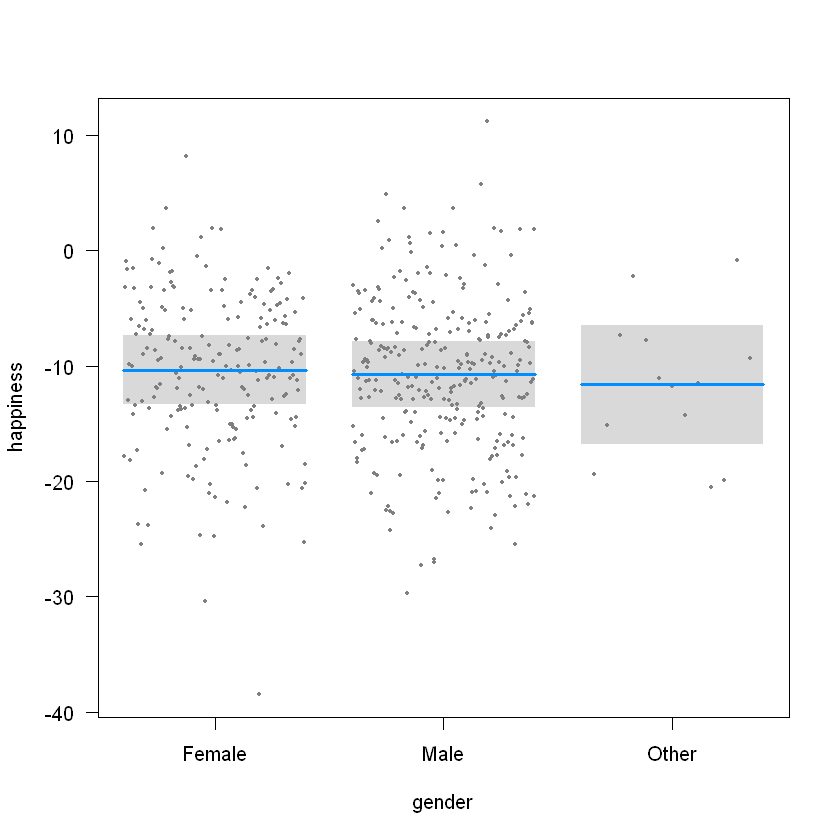

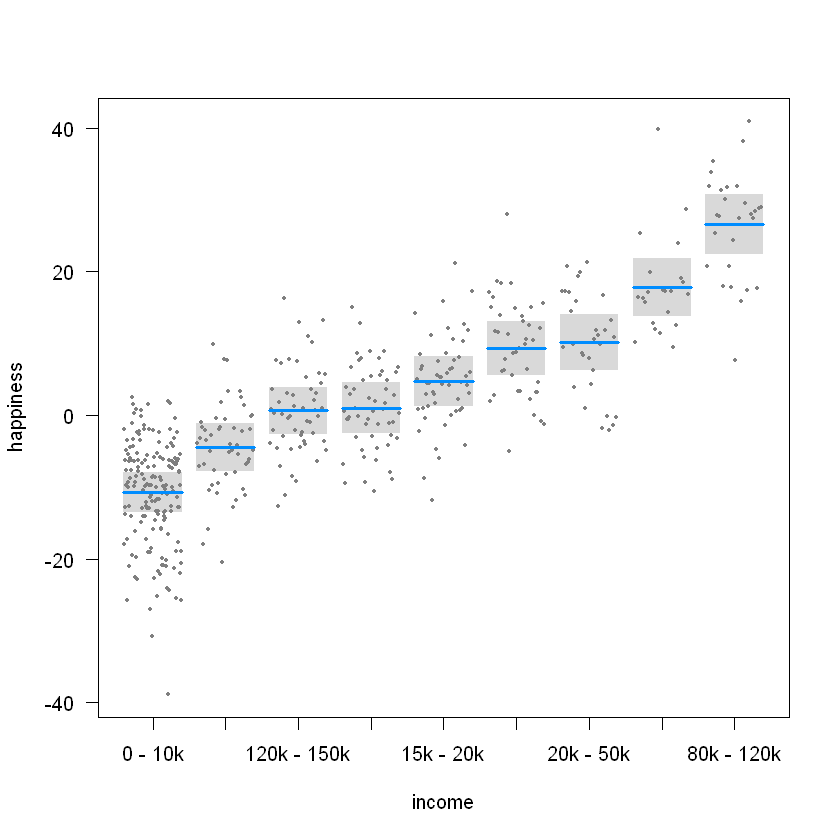

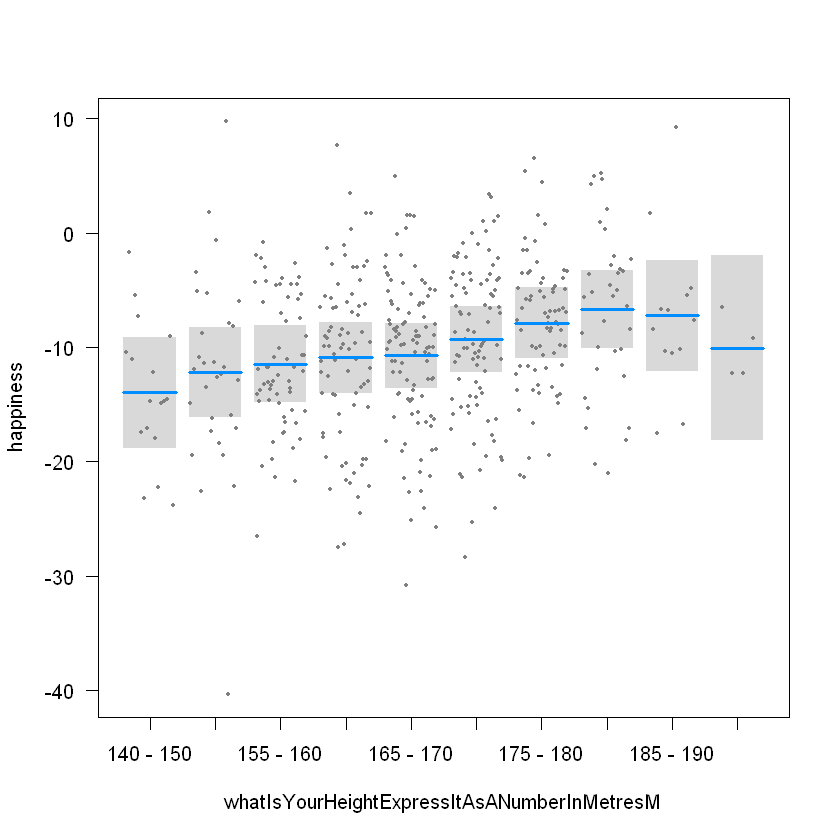

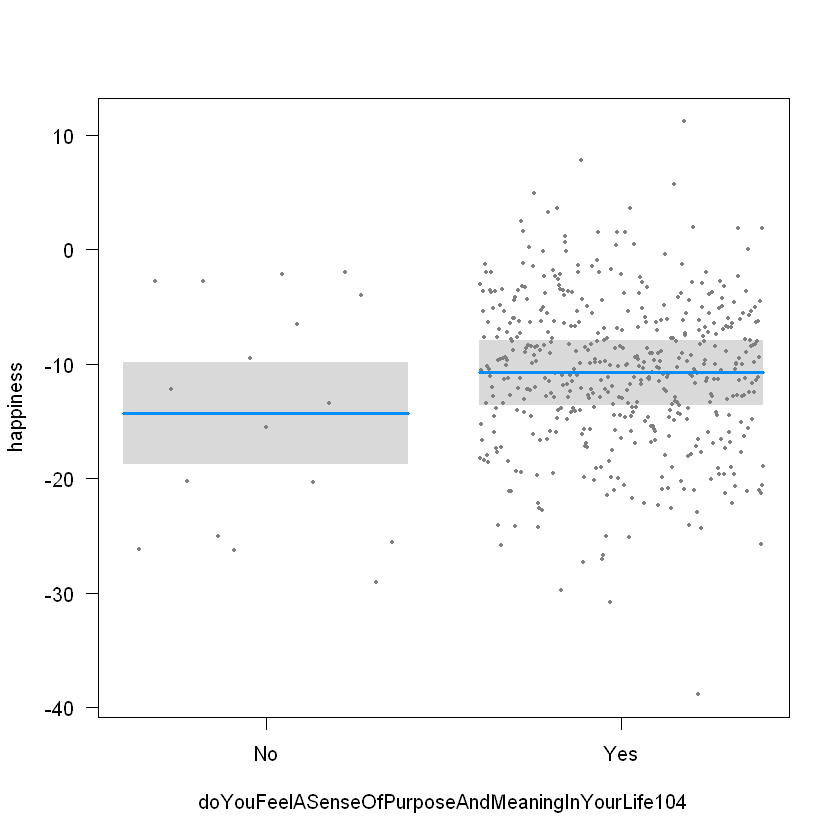

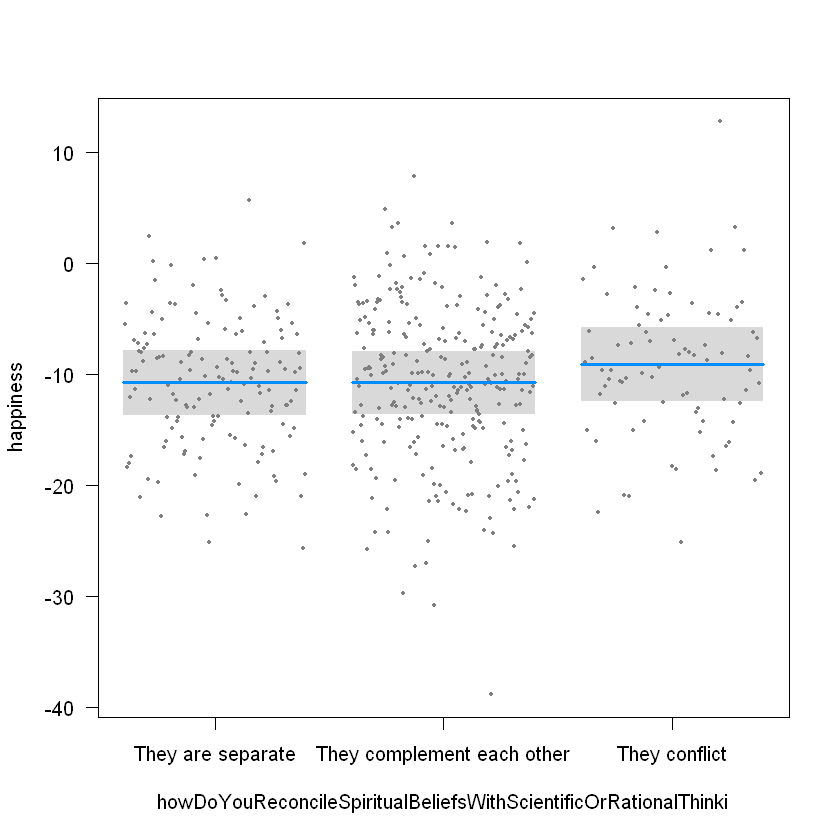

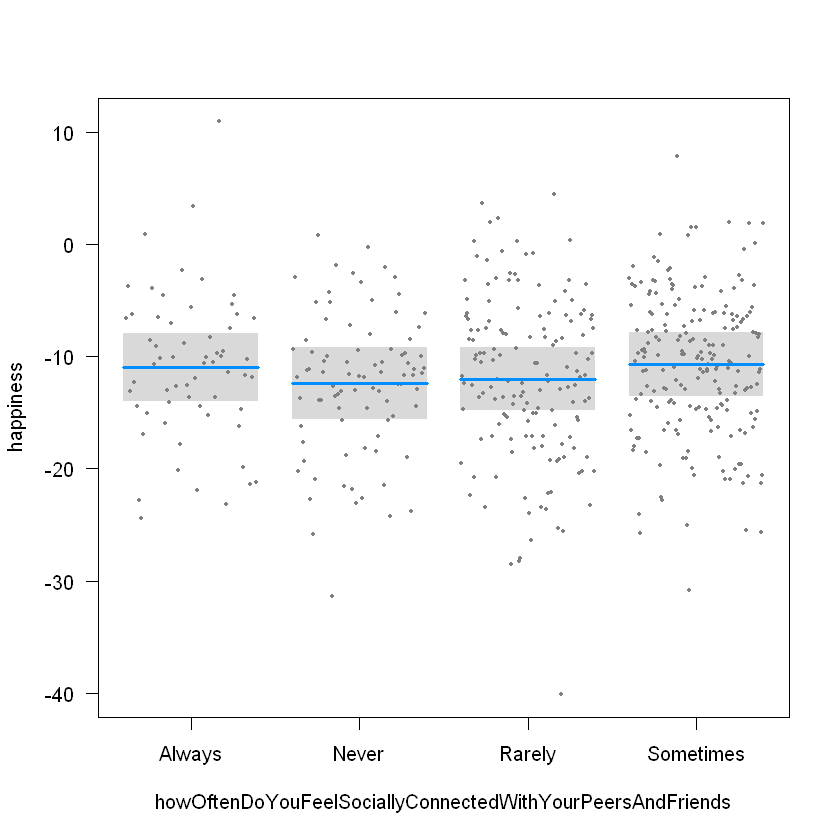

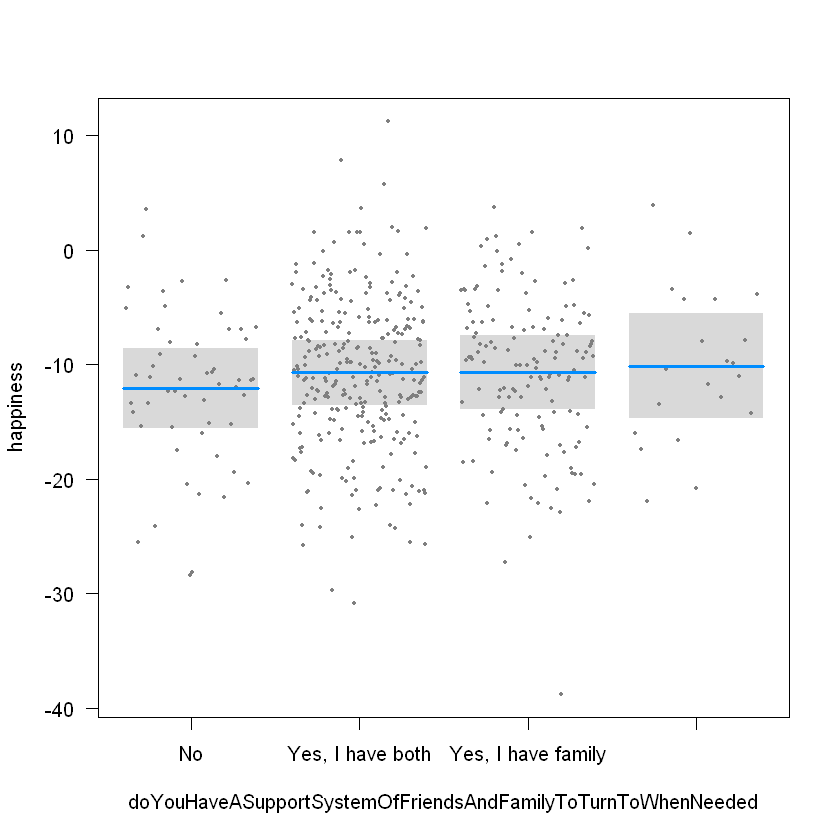

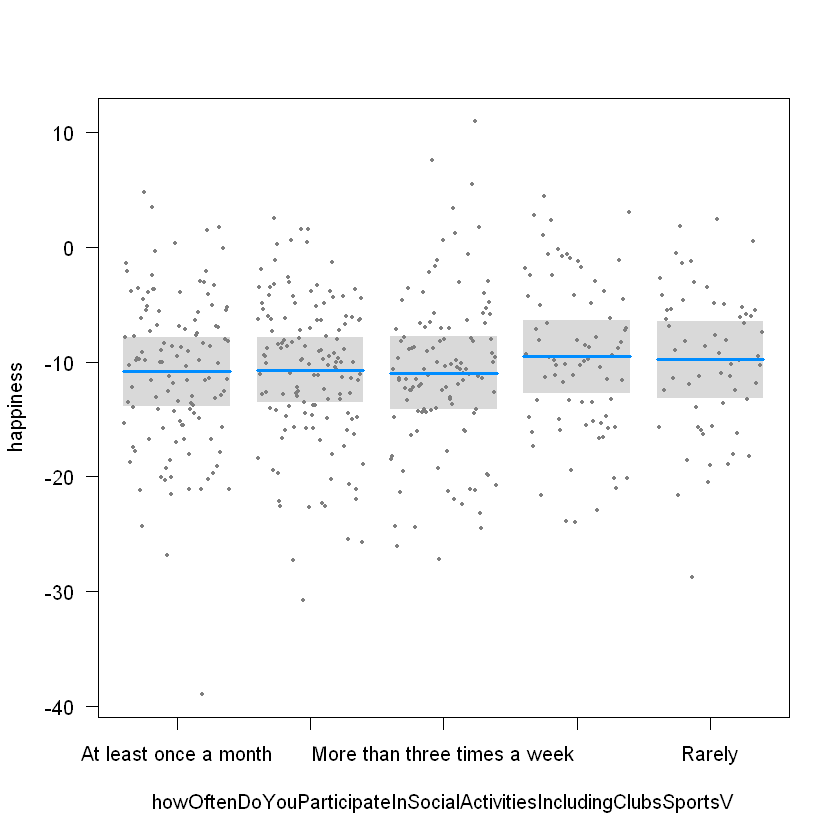

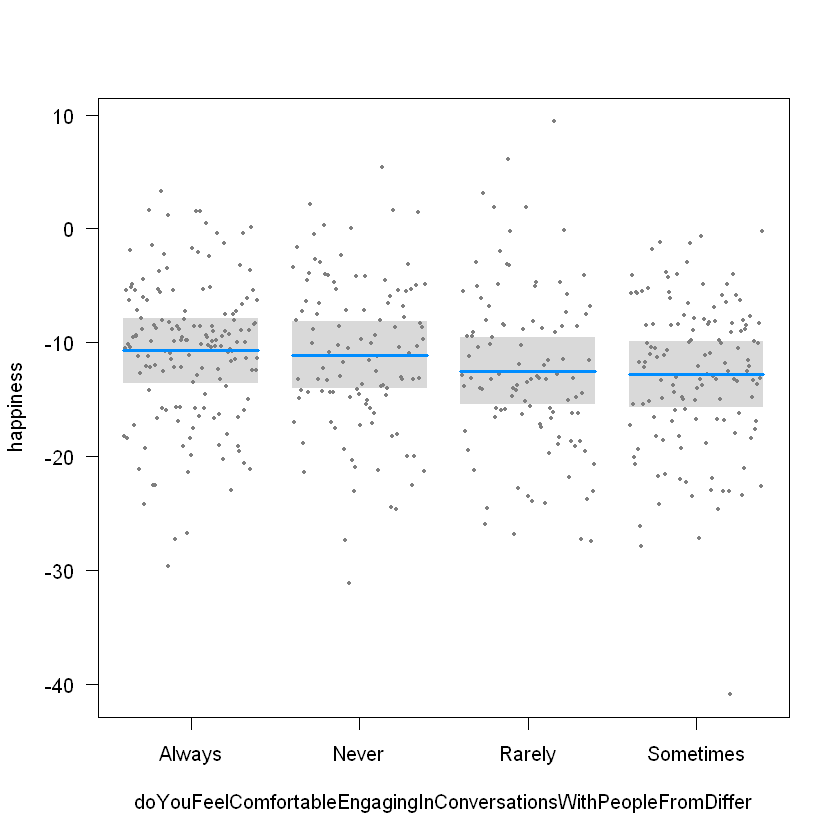

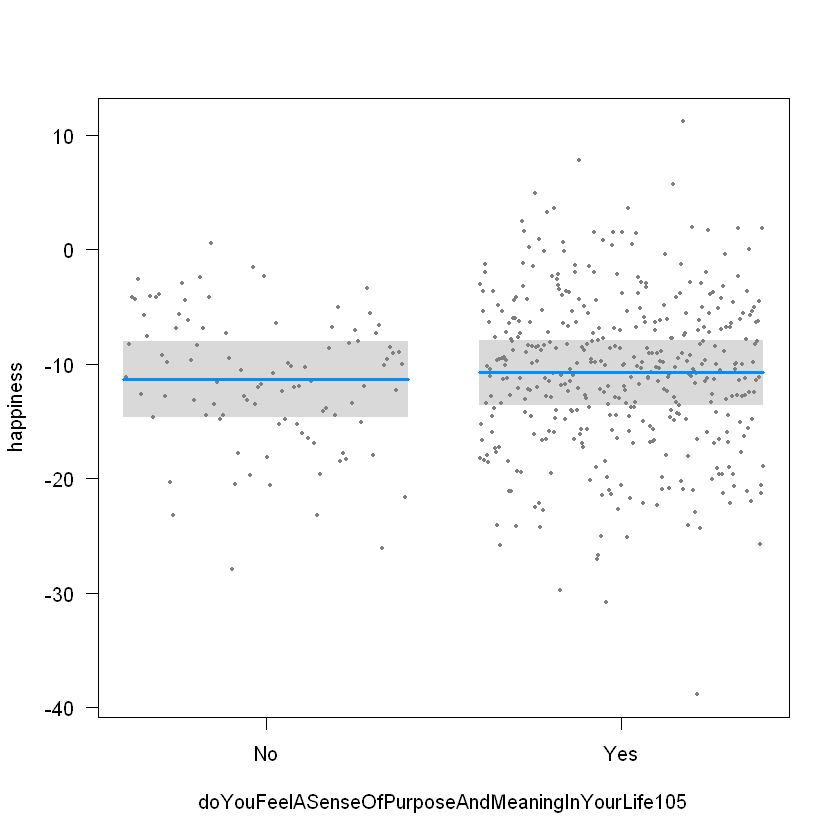

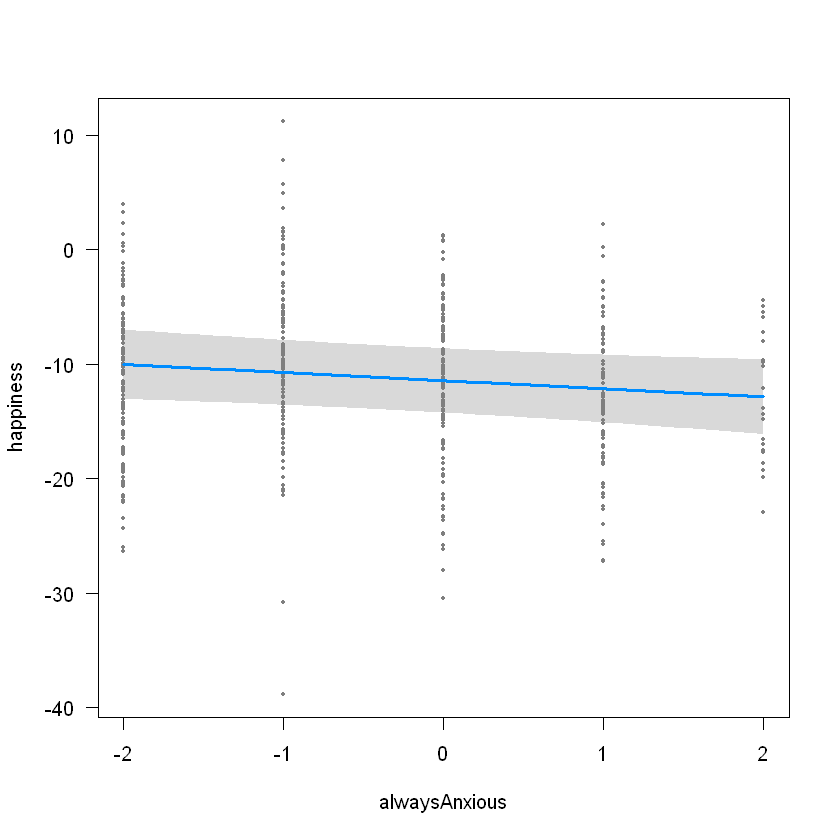

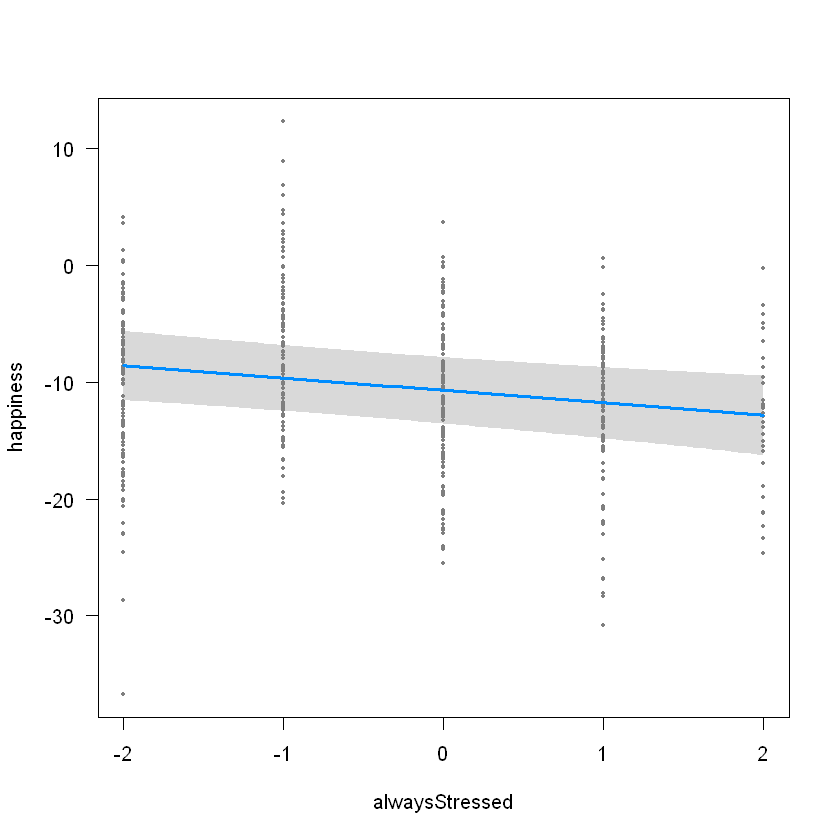

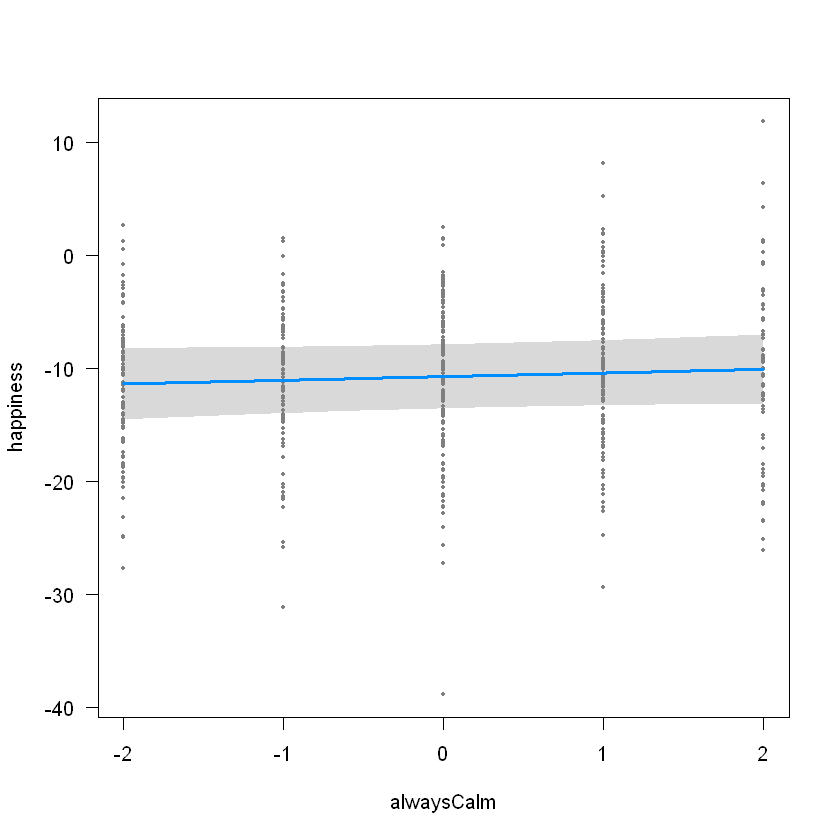

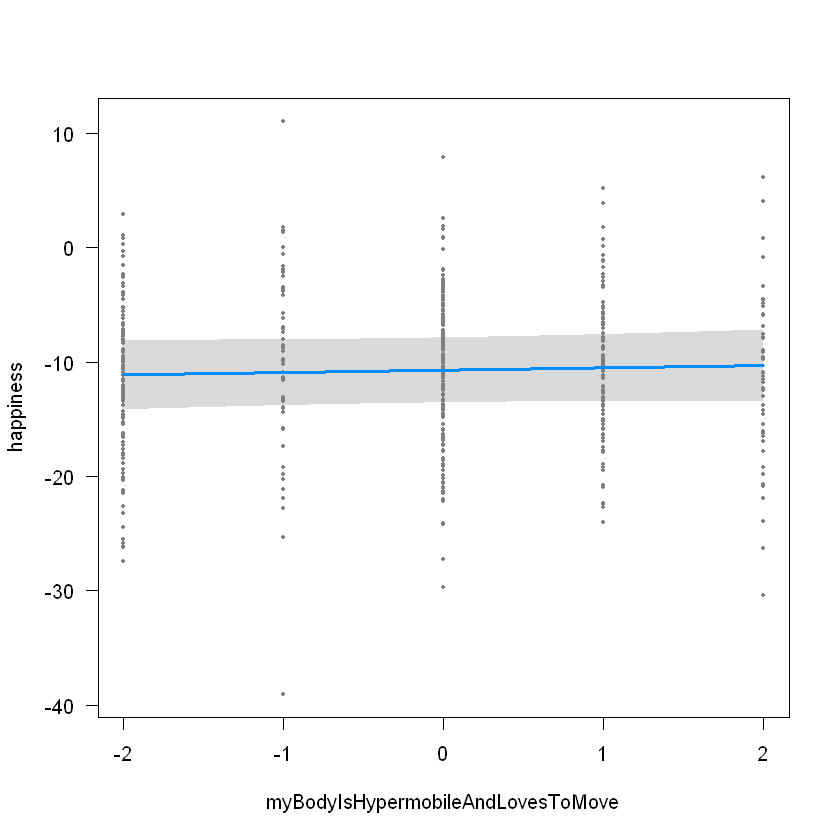

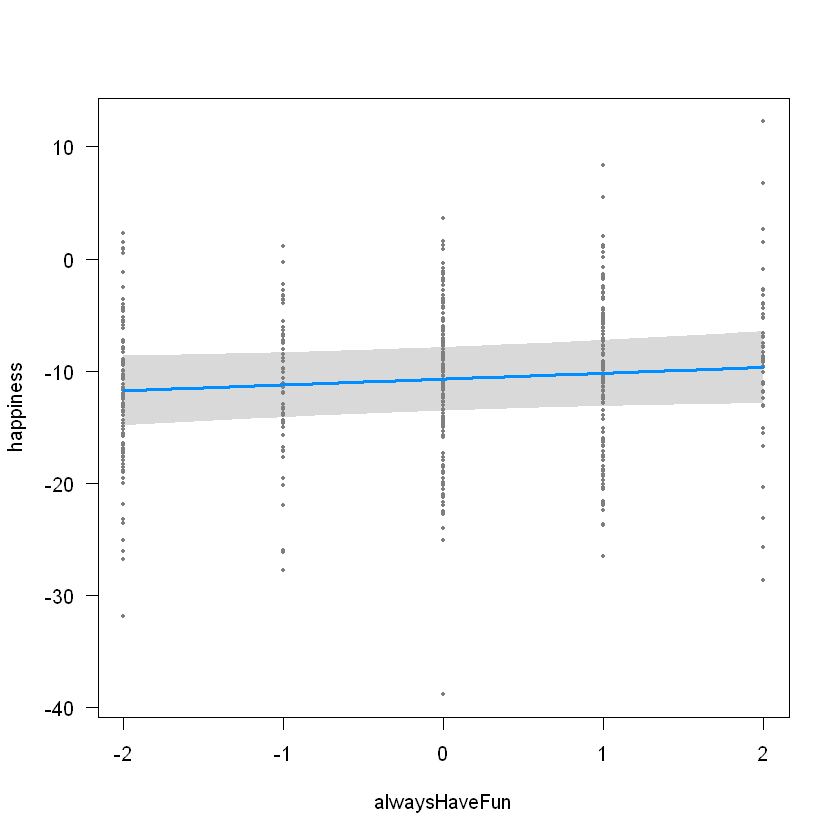

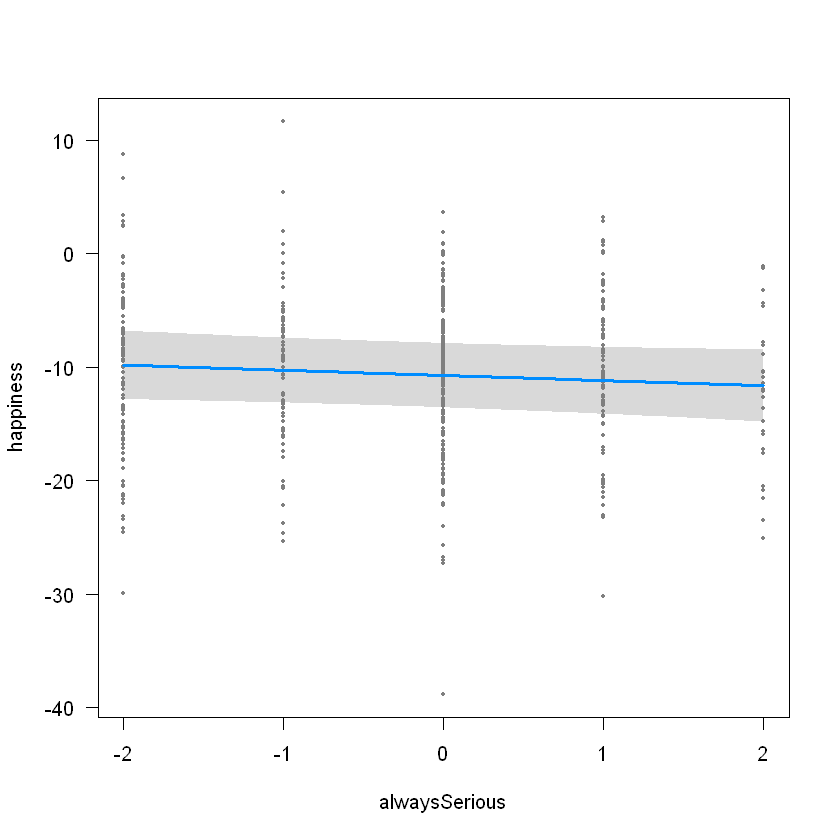

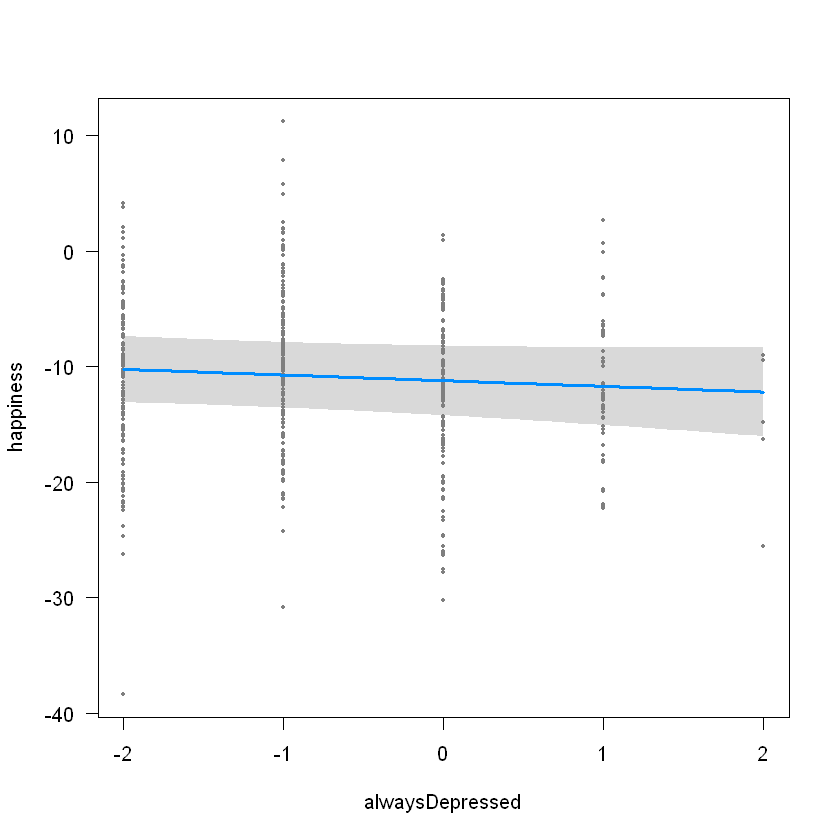

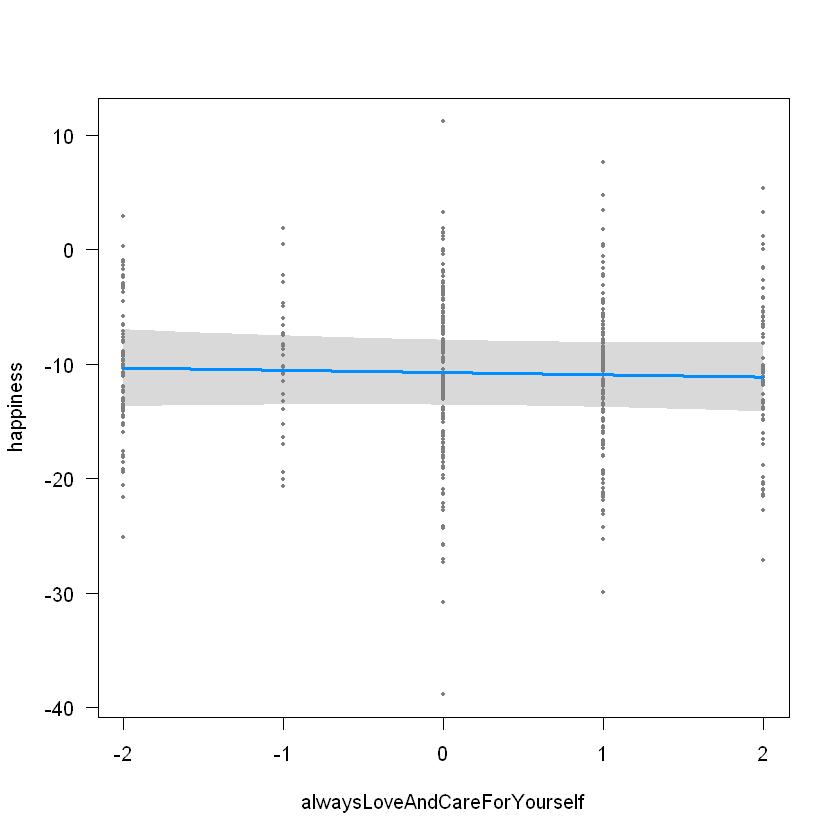

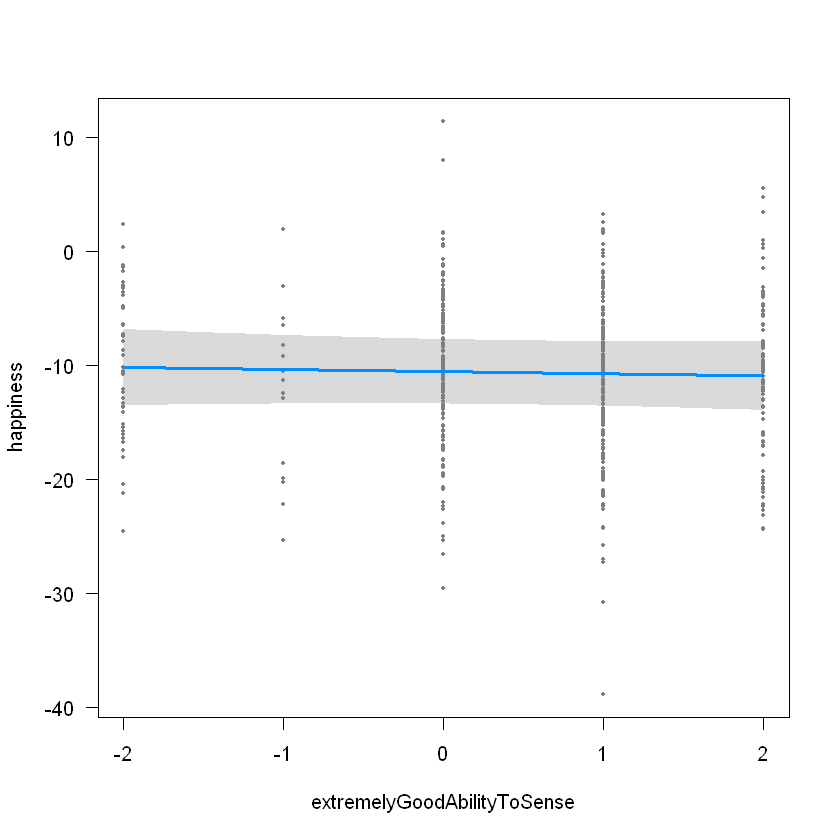

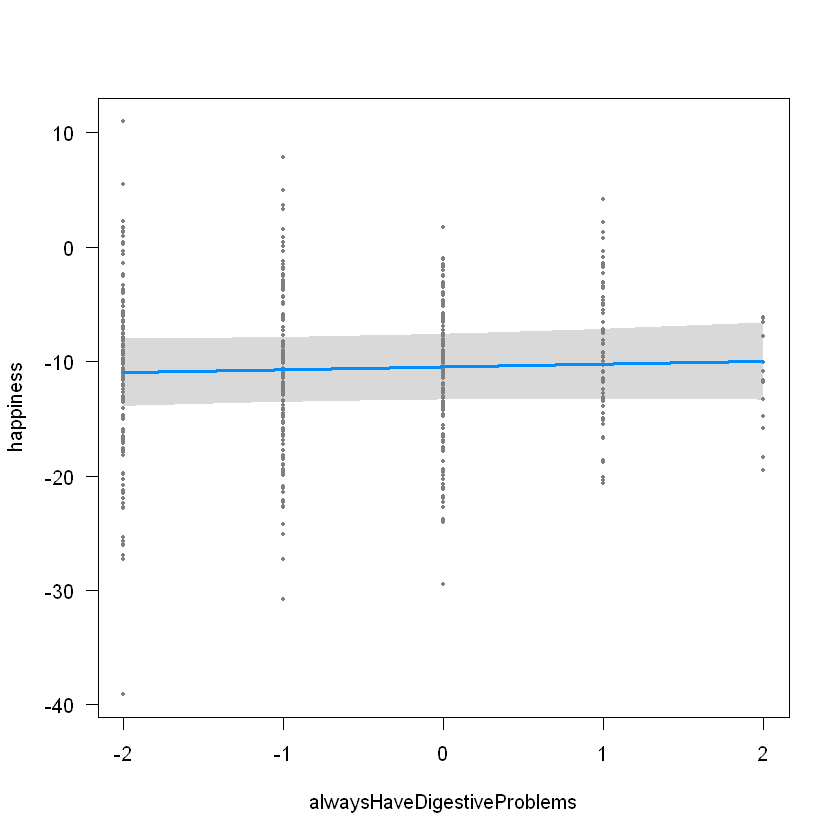

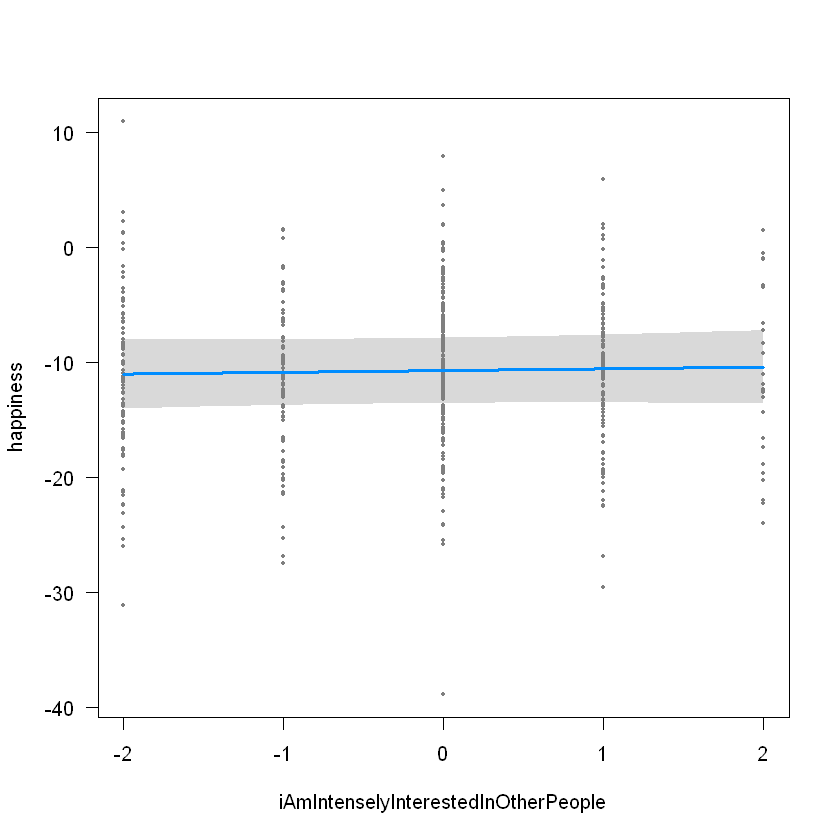

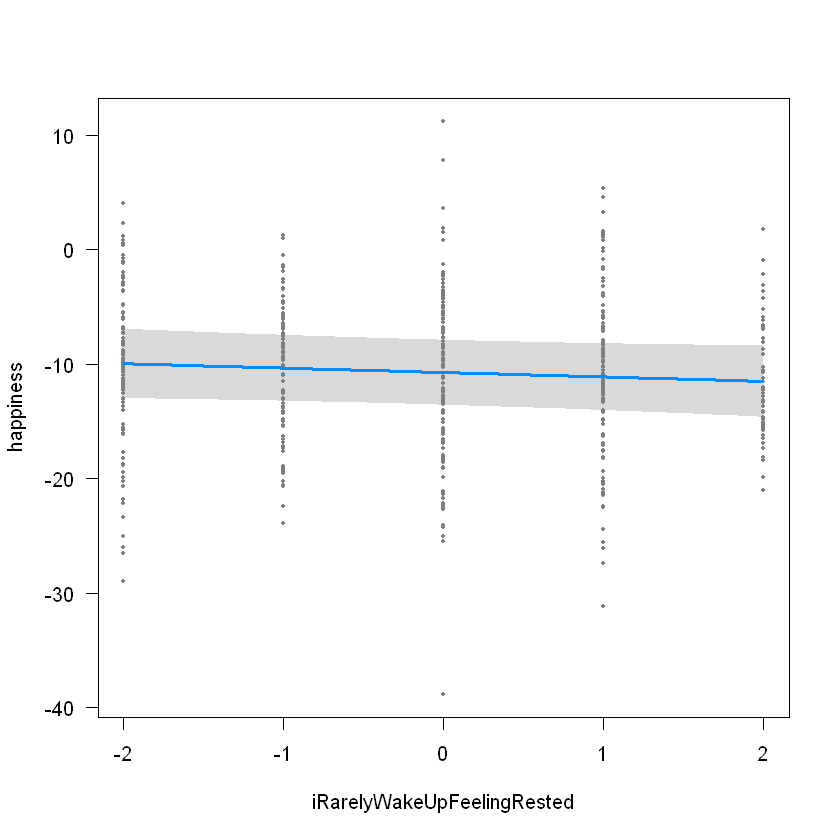

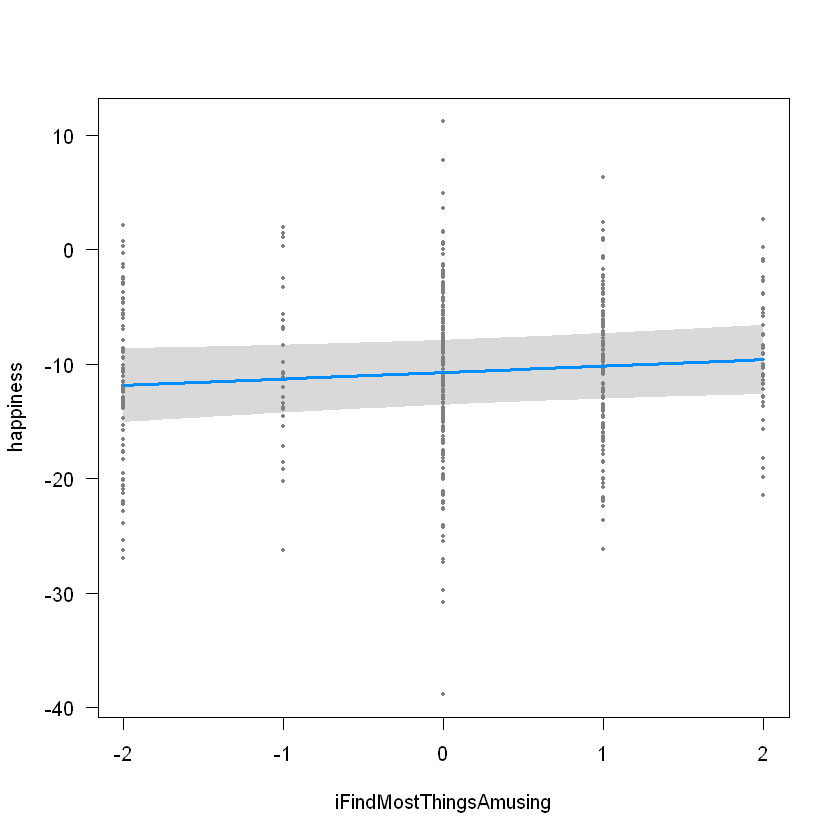

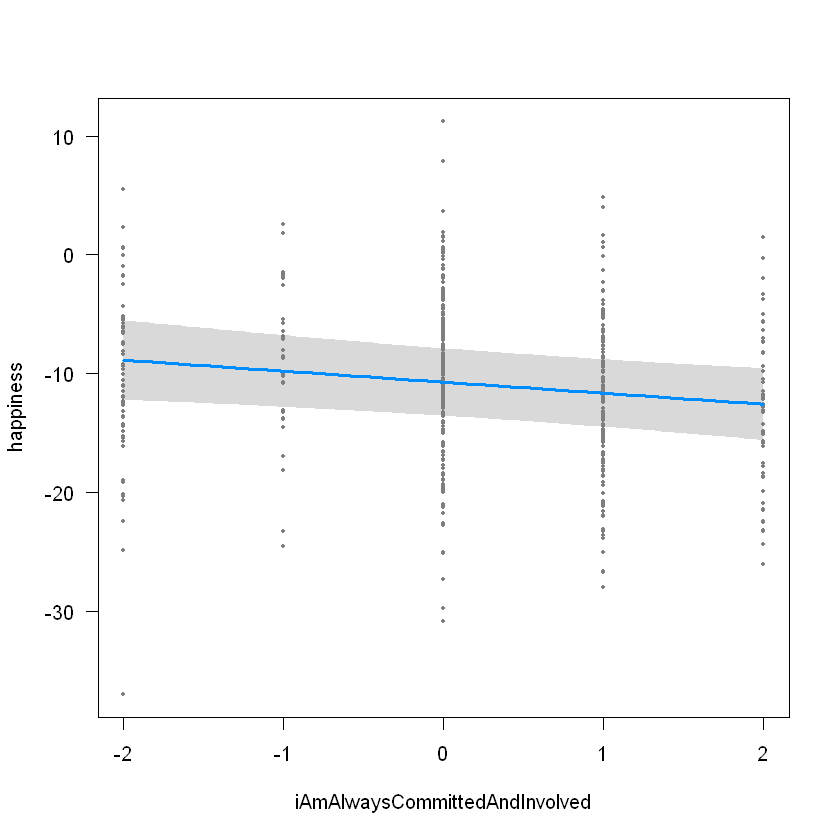

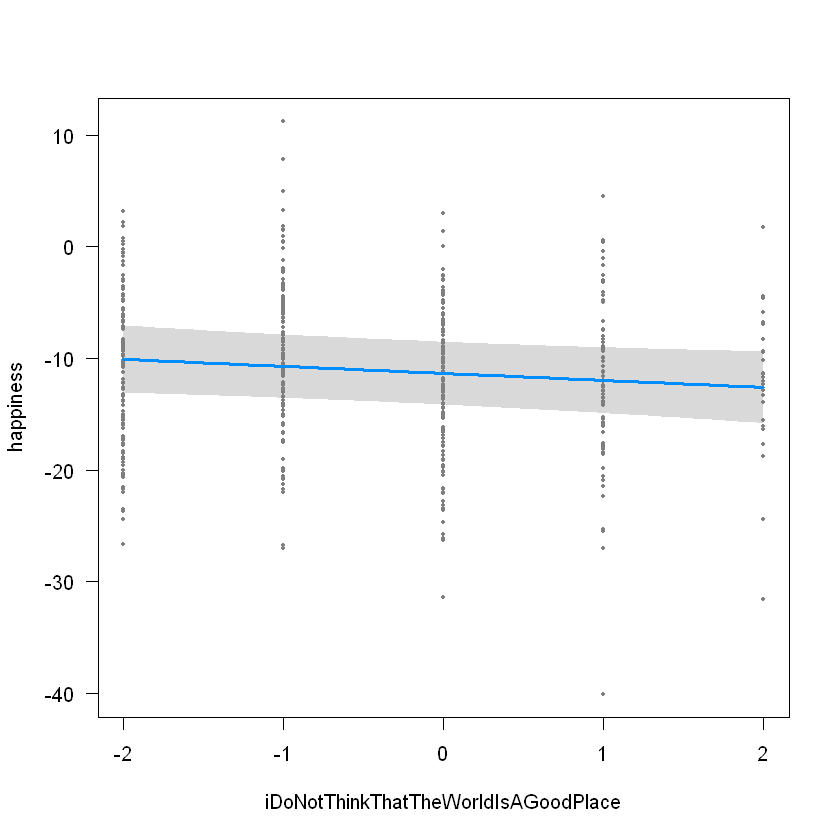

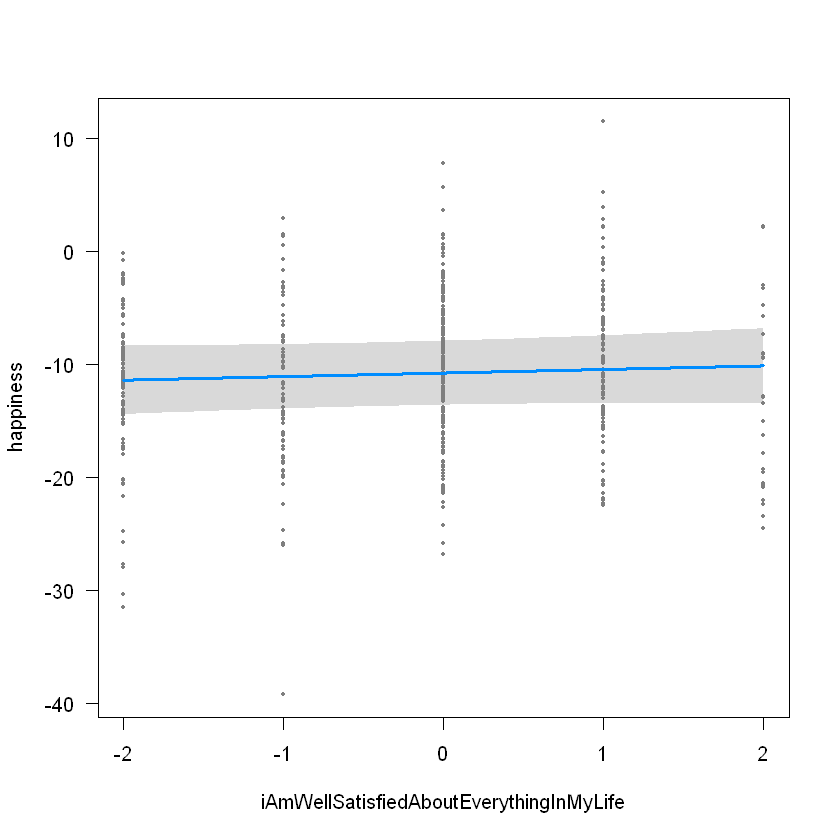

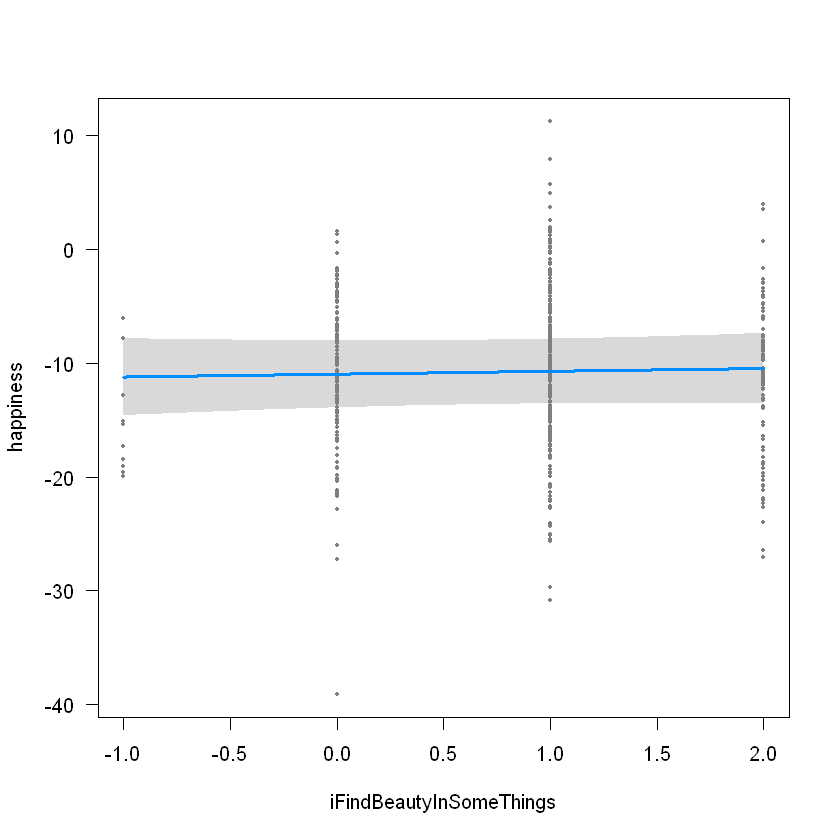

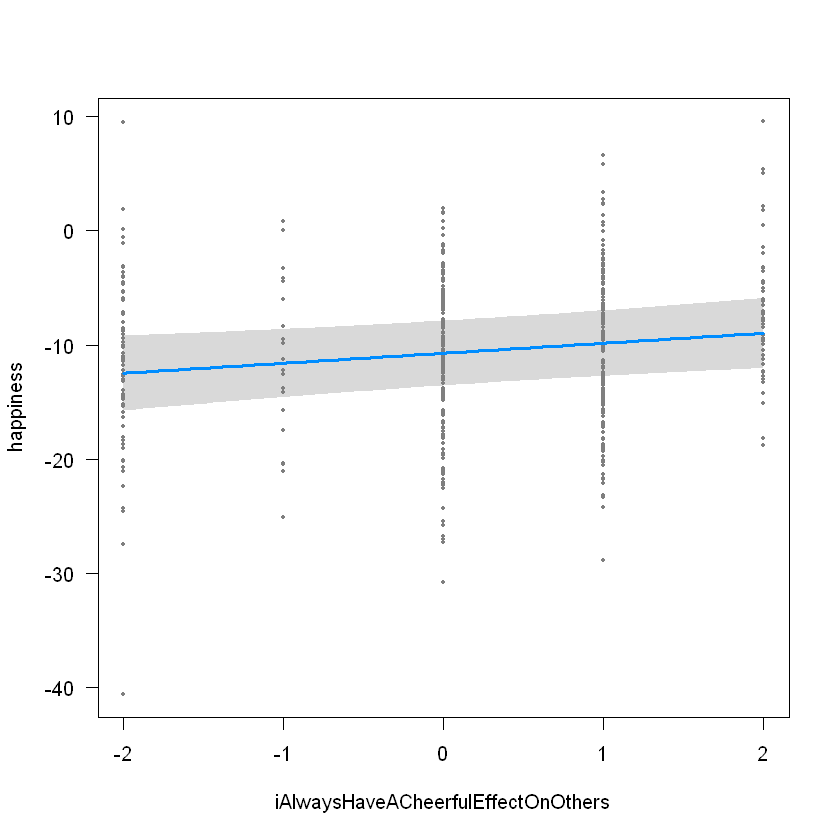

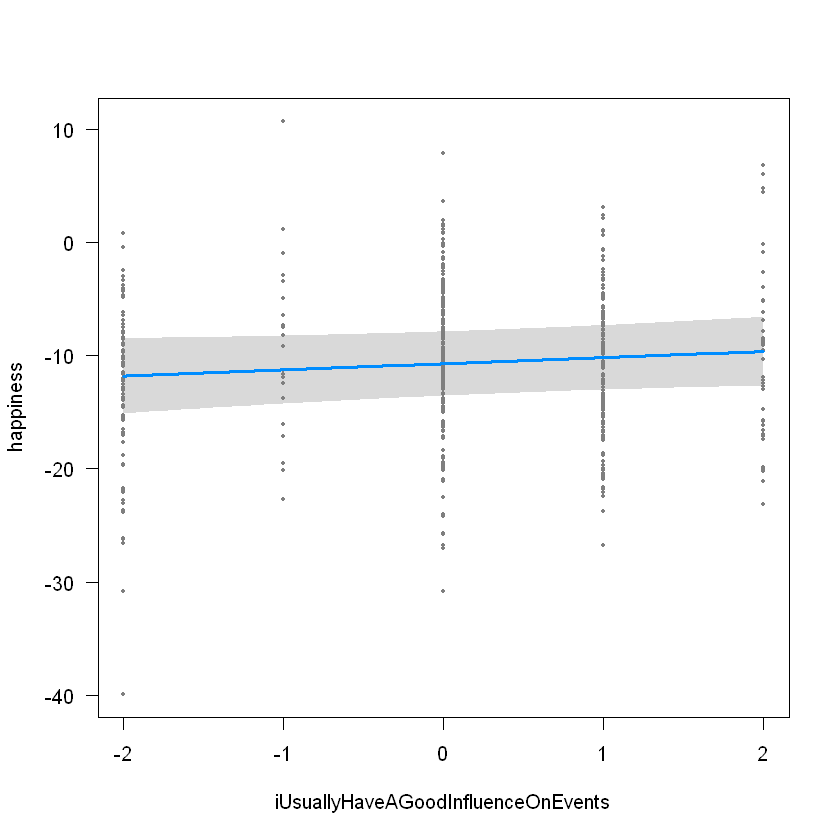

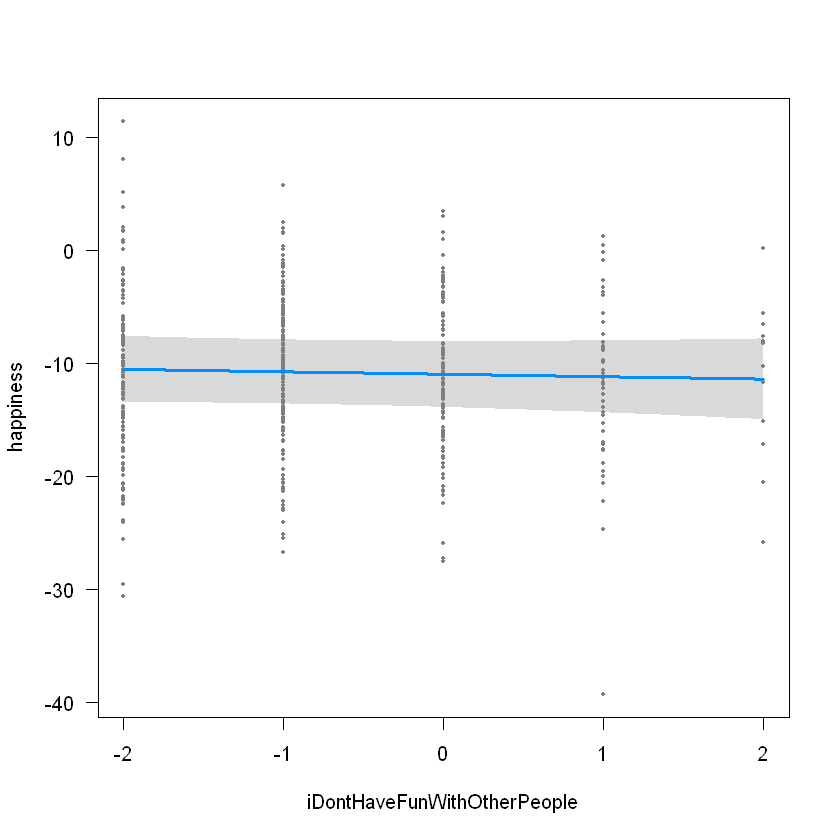

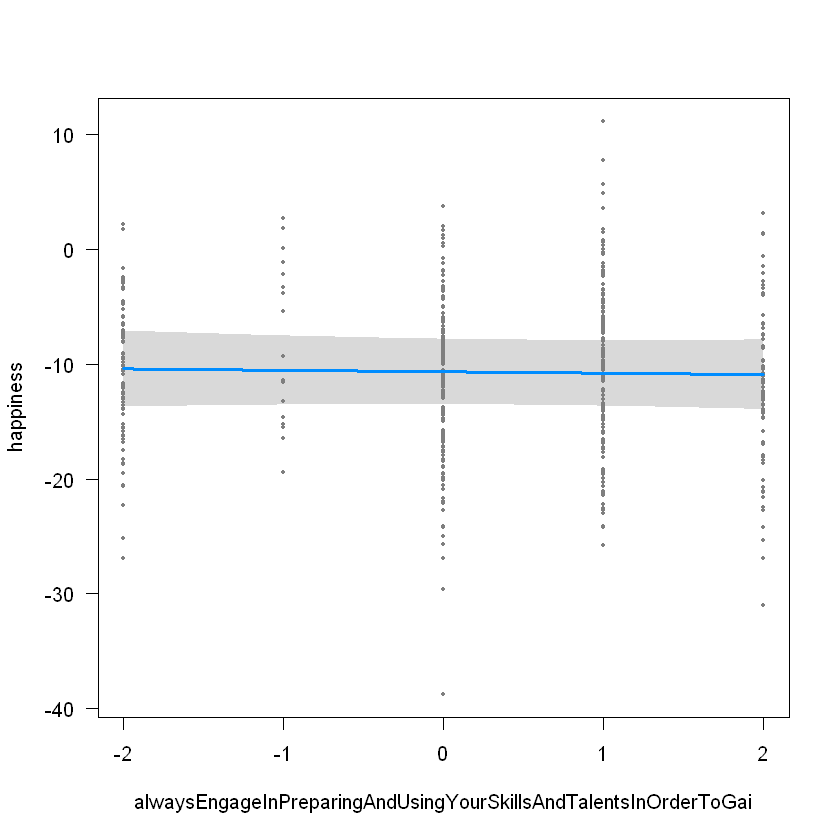

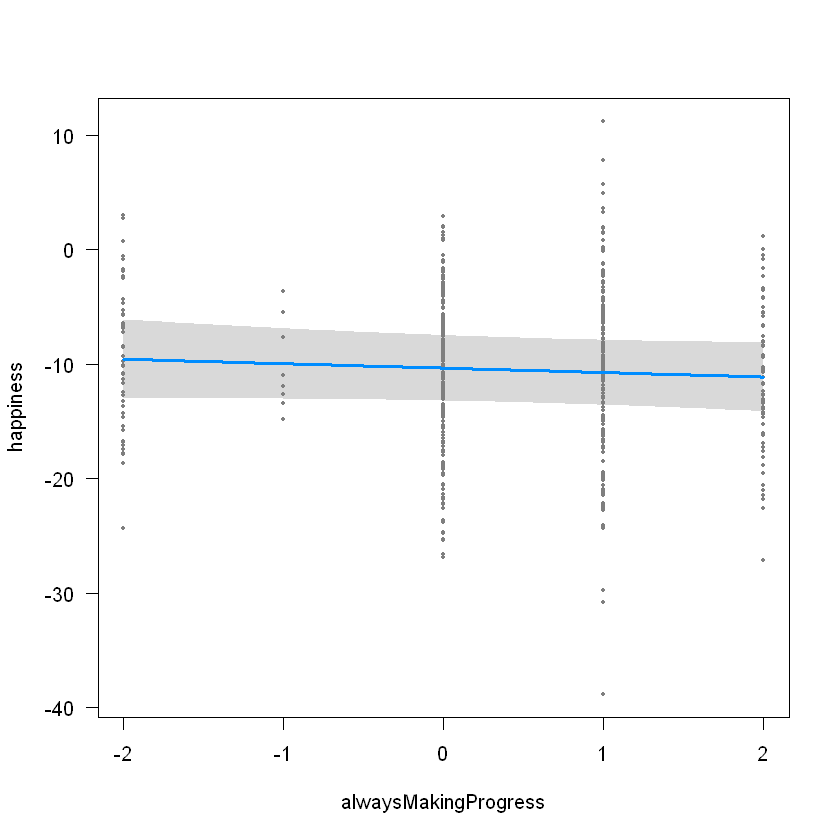

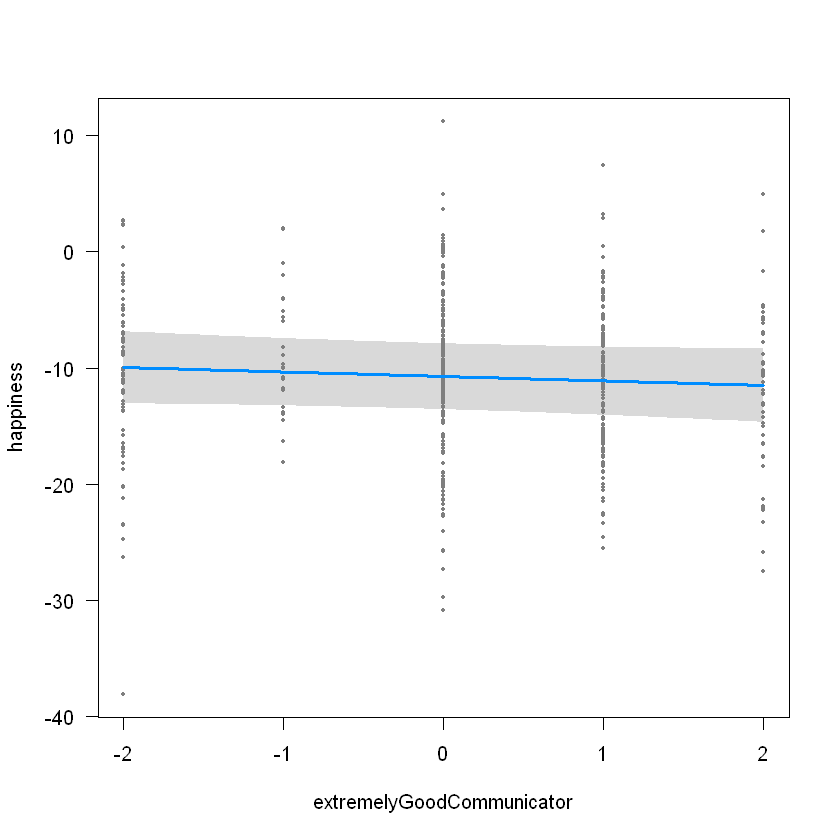

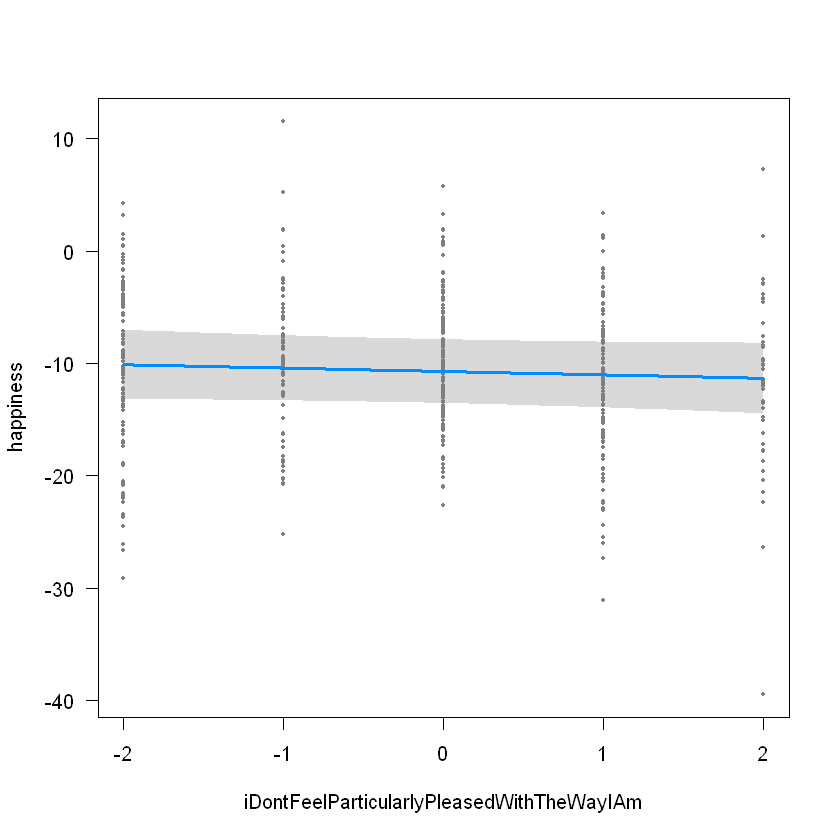

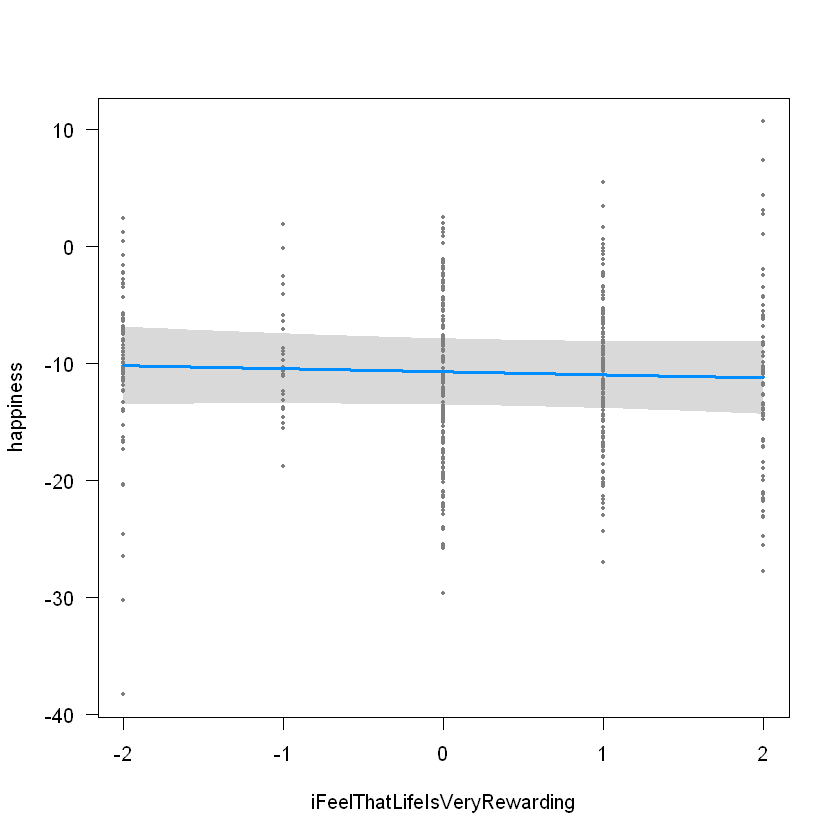

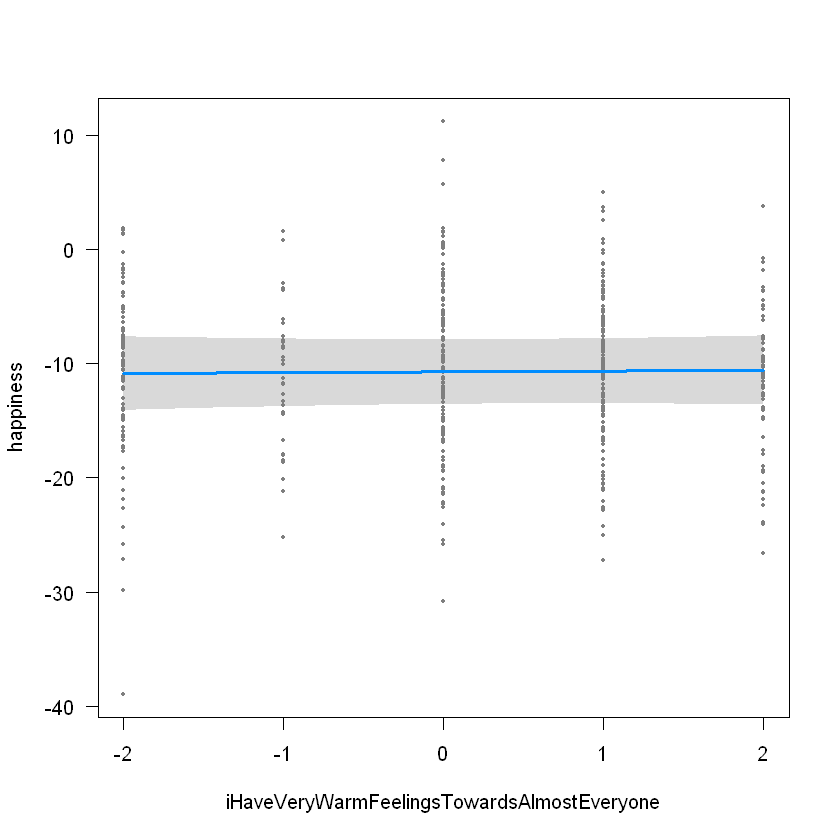

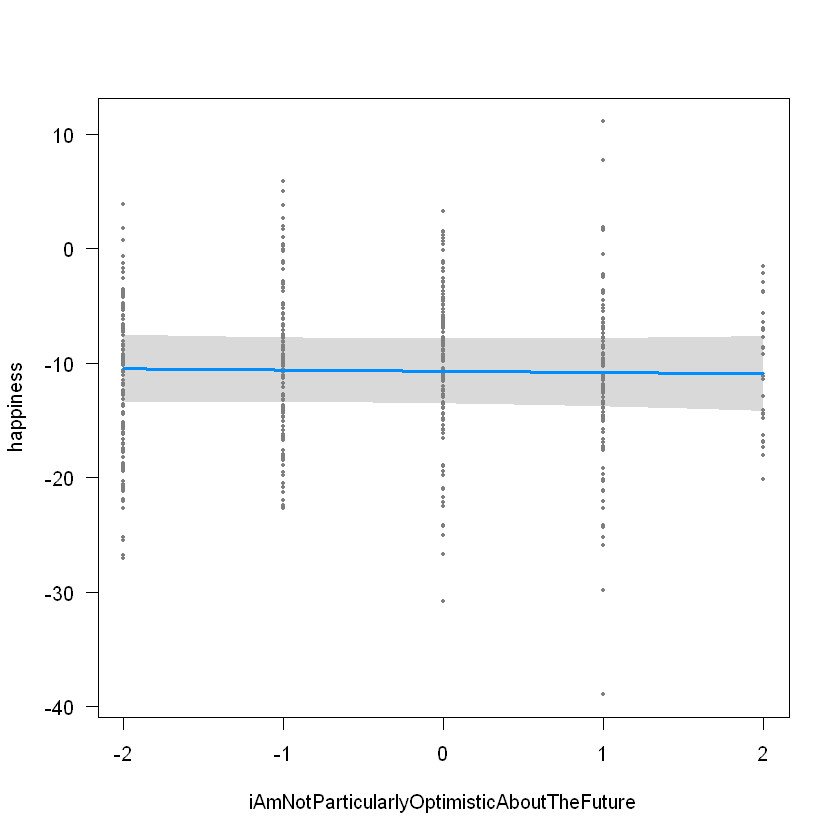

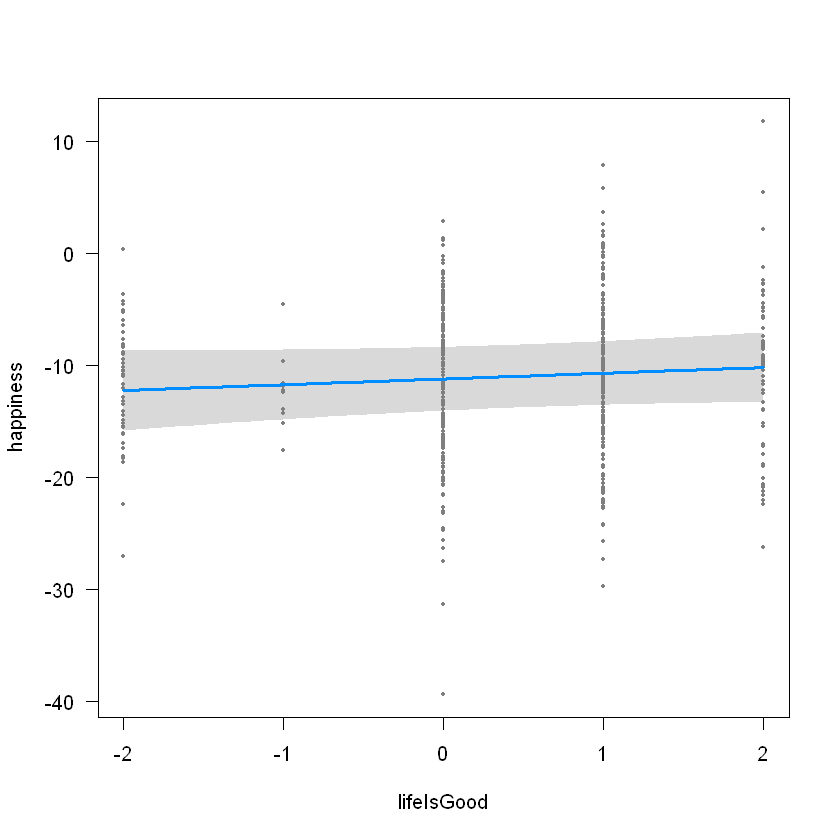

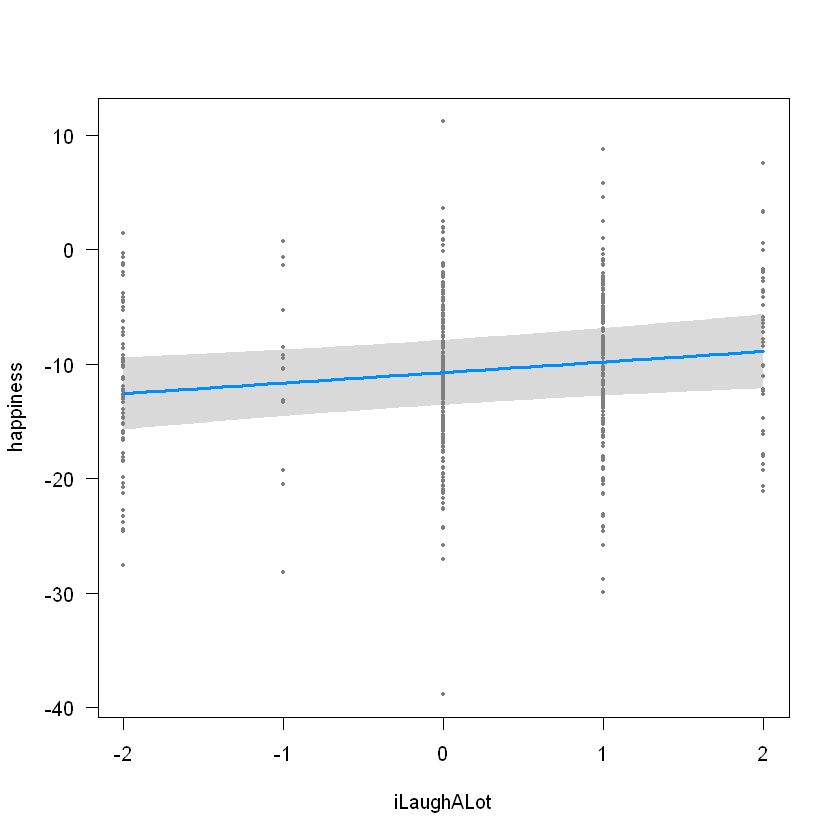

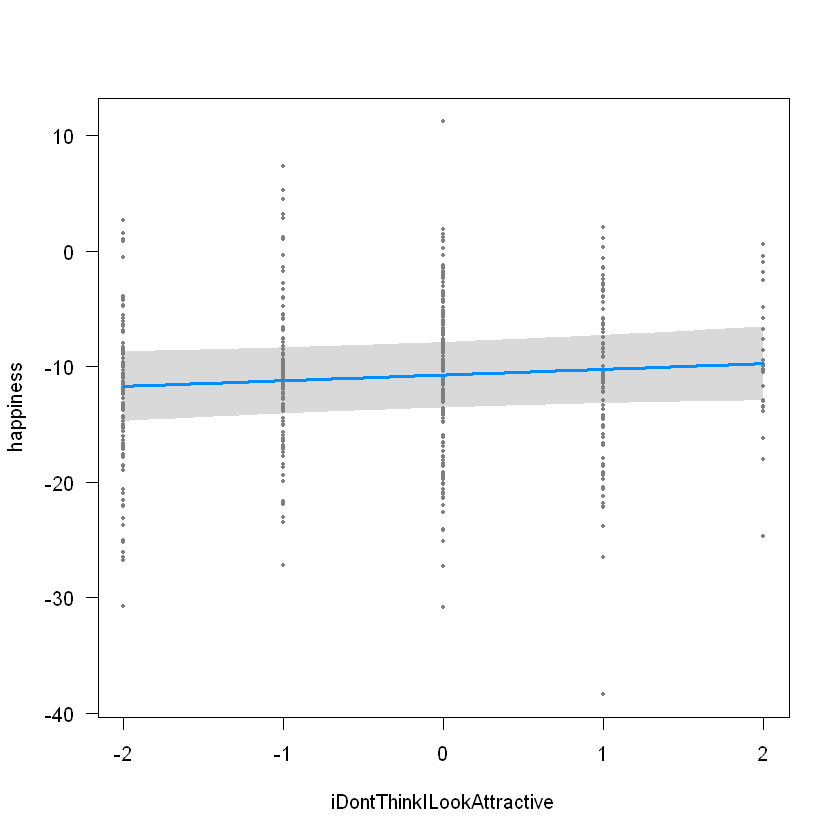

In [29]:
#Check the visualisation of the model, the variation of happiness for each and every input variable.
visreg(model0)

In [26]:
#New model.
#Model 1
# Fit the linear regression model
model1 <- lm(happiness ~ . -gender -iLaughALot -, data = train )


In [ ]:
#Model 2
# Fit the linear regression model
model2 <- lm(happiness ~ income + whatIsYourHeightExpressItAsANumberInMetresM + iAmAlwaysCommittedAndInvolved + alwaysStressed + iLaughALot, family = binomial, data = train )

In [45]:

#Model 3
# Fit the linear regression model
model3 <- lm(happiness ~ . -alwaysHaveDigestiveProblems  -iFindBeautyInSomeThings  -iAmNotParticularlyOptimisticAboutTheFuture -iHaveVeryWarmFeelingsTowardsAlmostEveryone   -iAmIntenselyInterestedInOtherPeople , data = train )


In [56]:

#Model 4.
# Fit the linear regression model
model4 <- lm(happiness ~ . , data = train_sub )


In [139]:
#Model 5. Dummy encoding. Group means. Removed insignificant p-values predictors.
# Not done collinearity teting.
# Fit the linear regression model

#model5 <- lm(happiness ~ . , data = train_model5 )

model5 <- lm(happiness ~ . -income -whatIsYourHeightExpressItAsANumberInMetresM -gender -iLaughALot -doYouFeelASenseOfPurposeAndMeaningInYourLife104 -howDoYouReconcileSpiritualBeliefsWithScientificOrRationalThinki  -howOftenDoYouFeelSociallyConnectedWithYourPeersAndFriends -doYouHaveASupportSystemOfFriendsAndFamilyToTurnToWhenNeeded -howOftenDoYouParticipateInSocialActivitiesIncludingClubsSportsV -doYouFeelComfortableEngagingInConversationsWithPeopleFromDiffer -doYouFeelASenseOfPurposeAndMeaningInYourLife105
                           -iAmAlwaysCommittedAndInvolved -iLaughALot -iAlwaysHaveACheerfulEffectOnOthers -iDoNotThinkThatTheWorldIsAGoodPlace -iFindMostThingsAmusing -iDontThinkILookAttractive -iUsuallyHaveAGoodInfluenceOnEvents -iRarelyWakeUpFeelingRested -iFeelThatIAmNotEspeciallyInControlOfMyLife -iDontFeelParticularlyPleasedWithTheWayIAm -iAmWellSatisfiedAboutEverythingInMyLife -iFeelThatLifeIsVeryRewarding -iDontHaveFunWithOtherPeople -iAmIntenselyInterestedInOtherPeople -iFindBeautyInSomeThings -iAmNotParticularlyOptimisticAboutTheFuture -iHaveVeryWarmFeelingsTowardsAlmostEveryone, data = train_model5 )

In [253]:
#Model 6. Dummy encoding. Group means. Removed insignificant p-values predictors.
# Not done collinearity teting.
# Fit the linear regression model

model6 <- lm(happiness ~ income_numeric +gender_Male +gender_Other +alwaysStressed +height_numeric +doYouFeelASenseOfPurposeAndMeaningInYourLife104_Yes +lifeIsGood +`howDoYouReconcileSpiritualBeliefsWithScientificOrRationalThinki_They conflict`,data = train_model5 )

In [36]:
#Model 7.
# Fit the linear regression model
#fullmodel <- lm(happiness ~ . , data = train_model5 )
#summary(fullmodel)   

#Step1
f1=lm(happiness~1,data=train_model5)

#Step2
step(f1,direction="forward",scope=formula(fullmodel))

#Step3
model7=lm(happiness~ income_numeric + alwaysStressed + iUsuallyHaveAGoodInfluenceOnEvents + 
    height_numeric + iLaughALot + lifeIsGood + alwaysDepressed + 
    iAlwaysHaveACheerfulEffectOnOthers + alwaysAnxious + alwaysHaveFun + 
    doYouFeelASenseOfPurposeAndMeaningInYourLife104 + howOftenDoYouFeelSociallyConnectedWithYourPeersAndFriends_Never + 
    iAmAlwaysCommittedAndInvolved + howOftenDoYouFeelSociallyConnectedWithYourPeersAndFriends_Rarely + 
    iDoNotThinkThatTheWorldIsAGoodPlace + `howDoYouReconcileSpiritualBeliefsWithScientificOrRationalThinki_They conflict` + 
    iFindMostThingsAmusing + doYouFeelComfortableEngagingInConversationsWithPeopleFromDiffer_Rarely   + 
    iDontThinkILookAttractive + alwaysSerious + iRarelyWakeUpFeelingRested + iDontFeelParticularlyPleasedWithTheWayIAm, 
    data = train_model5)
summary(model7)

ERROR: Error in is.data.frame(data): object 'train_model5' not found


In [259]:
#Model 8 - Neural net.


happy_nn <-nnet(happiness ~ income + alwaysStressed + iUsuallyHaveAGoodInfluenceOnEvents + 
    height_numeric + iLaughALot + lifeIsGood + alwaysDepressed + 
    iAlwaysHaveACheerfulEffectOnOthers + alwaysAnxious + alwaysHaveFun + 
    doYouFeelASenseOfPurposeAndMeaningInYourLife104 + howOftenDoYouFeelSociallyConnectedWithYourPeersAndFriends_Never + 
    iAmAlwaysCommittedAndInvolved + howOftenDoYouFeelSociallyConnectedWithYourPeersAndFriends_Rarely + 
    iDoNotThinkThatTheWorldIsAGoodPlace + `howDoYouReconcileSpiritualBeliefsWithScientificOrRationalThinki_They conflict` + 
    iFindMostThingsAmusing + doYouFeelComfortableEngagingInConversationsWithPeopleFromDiffer_Rarely + 
    doYouFeelComfortableEngagingInConversationsWithPeopleFromDiffer_Sometimes + 
    iDontThinkILookAttractive + alwaysSerious + iRarelyWakeUpFeelingRested,
                data=train_model5,hidden=10,size = 10,maxit = 1000,linear.output=TRUE)
#plot(happy_nn)

# weights:  311
initial  value 96756.153349 
final  value 96424.181666 
converged


## Question 2 (2 Mark)
[**R squared**](https://en.wikipedia.org/wiki/Coefficient_of_determination) from the summary table reflects that the full model doesn't fit the training dataset well; thus, you try to quantify the error between the values of the ground-truth and those of the model prediction. You want to write a function to predict 'happiness' with the given dataset and calculate the [root mean squared error (rMSE)](https://en.wikipedia.org/wiki/Root-mean-square_deviation) between the model predictions and the ground truths. Please test this function on the full model and the training dataset.

In [ ]:
# ANSWER BLOCK

## Question 3 (2 Marks)
You find the full model complicated and try to reduce the complexity by performing [bidirectional stepwise regression](https://en.wikipedia.org/wiki/Stepwise_regression) with [BIC](https://en.wikipedia.org/wiki/Bayesian_information_criterion).

Calculate the **rMSE** of this new model with the function that you implemented previously. Is there anything you find unusual? Explain your findings in 100 words.

In [ ]:
# ANSWER BLOCK

## Question 4 (2 Mark)
Although stepwise regression has reduced the model complexity significantly, the model still contains a lot of variables that we want to remove. Therefore, you are interested in lightweight linear regression models with ONLY TWO predictors. Write a script to automatically find the best lightweight model which corresponds to the model with the least **rMSE** on the training dataset. Compare the **rMSE** of the best lightweight model with the **rMSE** of the full model - ```lm.fit``` - that you built previously. Give an explanation for these results based on consideration of the predictors involved.

In [ ]:
# ANSWER BLOCK

### ANSWER (TEXT)

## Question 5 (Libraries are allowed) (40 Marks)
As a Data Scientist, one of the key tasks is to build models $\textbf{most appropriate/closest}$ to the truth; thus, modelling will not be limited to the aforementioned steps in this assignment. To simulate for a realistic modelling process, this question will be in the form of a [Kaggle competition](https://www.kaggle.com/t/ad8c96e412254c138cbec1d9d1c09734) among students to find out who has the best model.

Thus, you **will be graded** by the **rMSE** performance of your model, the better your model, the higher your score. Additionally, you need to describe/document your thought process in this model building process, this is akin to showing your working properly for the mathematic sections. If you don't clearly document the reasonings behind the model you use, we will have to make some deductions on your scores.

This is the [video tutorial](https://www.youtube.com/watch?v=rkXc25Uvyl4) on how to join any Kaggle competition. 

When you optimize your model's performance, you can use any supervised model that you know and feature selection might be a big help as well. [Check the non-exhaustive set of R functions relevant to this unit](https://learning.monash.edu/mod/resource/view.php?id=2017193) for ideas for different models to try.

$\textbf{Note}$ Please make sure that we can install the libraries that you use in this part, the code structure can be:

```install.packages("some package", repos='http://cran.us.r-project.org')```

```library("some package")```

Remember that if we cannot run your code, we will have to give you a deduction. Our suggestion is for you to use the standard ```R version 3.6.1```

You also need to name your final model ``fin.mod`` so we can run a check to find out your performance. A good test for your understanding would be to set the previous $\textbf{BIC model}$ to be the final model to check if your code works perfectly.

In [260]:
# Build your final model here, use additional coding blocks if you need to
fin.mod <- happy_nn

In [261]:
# Load in the test data.
#test <- read.csv("regression_test.csv")
# If you are using any packages that perform the prediction differently, please change this line of code accordingly.
pred.label <- predict(fin.mod, test_model5)
# put these predicted labels in a csv file that you can use to commit to the Kaggle Leaderboard
write.csv(
    data.frame("RowIndex" = seq(1, length(pred.label)), "Prediction" = pred.label),  
    "RegressionPredictLabel.csv", 
    row.names = F
)

In [254]:
summary_model5 <- summary(model6)
summary(model6)


Call:
lm(formula = happiness ~ income_numeric + gender_Male + gender_Other + 
    alwaysStressed + height_numeric + doYouFeelASenseOfPurposeAndMeaningInYourLife104_Yes + 
    lifeIsGood + `howDoYouReconcileSpiritualBeliefsWithScientificOrRationalThinki_They conflict`, 
    data = train_model5)

Residuals:
    Min      1Q  Median      3Q     Max 
-35.979  -5.207   0.804   5.152  22.817 

Coefficients:
                                                                                  Estimate
(Intercept)                                                                     -5.054e+01
income_numeric                                                                   1.625e-04
gender_Male                                                                     -1.769e-01
gender_Other                                                                     3.094e-01
alwaysStressed                                                                  -2.589e+00
height_numeric                                   

In [180]:
summary_model5$coefficients[, 4]

(Intercept) 
                                                                   3.297660e-11 
                                                                 income_numeric 
                                                                   1.619361e-96 
                                                                 alwaysStressed 
                                                                   7.060696e-16 
                                                                 height_numeric 
                                                                   3.537028e-07 
                            doYouFeelASenseOfPurposeAndMeaningInYourLife104_Yes 
                                                                   1.417398e-03 
                                                                     lifeIsGood 
                                                                   5.097757e-06 
`howDoYouReconcileSpiritualBeliefsWithScientificOrRationalThinki_They conflict` 
                                                                   1.505190e-02

In [179]:
my.pred.stats(predict(model6, test_model5, type="response"), test_model5$happiness)

ERROR: Error in my.pred.stats(predict(model6, test_model5, type = "response"), : could not find function "my.pred.stats"


# Part 2 Classification (50 Marks)

A few thousand people were questioned in a [life and wellbeing survey](https://www.get-happier.com/) to build a model to predict happiness of an individual, but this time we want to predict a categorical score for perfect mental health, rather than a continuous score. You need to build 5-class classification models to optimally predict the variable in the survey dataset called 'perfectMentalHealth' based on any, or all, of the other survey question responses. 

You have been provided with two datasets, ```classification_train.csv``` and ```classification_test.csv```. Using these datasets, you hope to build a model that can predict 'perfectMentalHealth' using the other variables. ```classification_train.csv``` comes with the ground-truth target label (i.e. 'perfectMentalHealth' happiness classes) whereas `classification_test.csv` comes with independent variables (input information) only.

On the order of around 70 survey questions have been converted into predictor variables that can be used to predict 'perfectMentalHealth'. We do not list all the predictor names here, but their names given in the data header can clearly be linked to the survey questions. E.g. the predictor variable 'iDontFeelParticularlyPleasedWithTheWayIAm' corresponds to the survey question 'I don’t feel particularly pleased with the way I am.'

This question will also be in the form of a [Kaggle competition](https://www.kaggle.com/t/968d3b346acb47779771f47785c39e62) among students to find out who has the best model.

In [ ]:
# Load in the train and test classification data.
train <- 
test <- 

# Build your final model here, use additional coding blocks if you need to
fin.mod <- 

# If you are using any packages that perform the prediction differently, please change this line of code accordingly.
pred.label <- predict(fin.mod, test)
# put these predicted labels in a csv file that you can use to commit to the Kaggle Leaderboard
write.csv(
    data.frame("RowIndex" = seq(1, length(pred.label)), "Prediction" = pred.label),  
    "ClassificationPredictLabel.csv", 
    row.names = F
)

In [ ]:
## PLEASE DO NOT ALTER THIS CODE BLOCK, YOU ARE REQUIRED TO HAVE THIS CODE BLOCK IN YOUR JUPYTER NOTEBOOK SUBMISSION
## Please skip (don't run) this if you are a student
## For teaching team use only

truths <- tryCatch(
    {
        read.csv("../classification_test_label.csv")
    },
    error = function(e){
        read.csv("classification_test_label.csv")
    }
)

f1_score <- F1_Score(truths$x, pred.label)
cat(paste("f1_score is", f1_score))